# Daily Climate time series data

Daily climate data in the city of Delhi from 2013 to 2017


## Content

Este conjunto de dados fornece dados de 1o de janeiro de 2013 a 24 de abril de 2017 na cidade de Delhi, Índia. Os 4 parâmetros aqui são:
Meantemp, umidade, wind_speed, meanpressure.

## Imports

In [179]:
import numpy as np 
import pandas as pd 
import statsmodels.tsa.stattools as st

import os
for dirname, _, filenames in os.walk('Temp'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Temp/DailyDelhiClimateTest.csv
Temp/DailyDelhiClimateTrain.csv


## Read csv and separate

In [180]:
df_train = pd.read_csv("Temp/DailyDelhiClimateTrain.csv")
df_test = pd.read_csv("Temp/DailyDelhiClimateTest.csv")

### Normalize

In [181]:
from sklearn import preprocessing


numeric_columns = df_train.select_dtypes(include=[np.number]).columns
scaler = preprocessing.StandardScaler()
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])
#df_train[numeric_columns] = preprocessing.normalize(df_train[numeric_columns], norm='max', axis=1)

### Train

In [182]:
df_train.head()

date  meantemp  humidity  wind_speed  meanpressure
0  2013-01-01 -2.109500  1.415439   -1.491699      0.025321
1  2013-01-02 -2.463454  1.862828   -0.838196      0.037162
2  2013-01-03 -2.495219  1.564569   -0.475626      0.041972
3  2013-01-04 -2.291015  0.630022   -1.221233      0.033647
4  2013-01-05 -2.654044  1.554627   -0.680303      0.029946

In [183]:
print(df_train.shape)
print(df_train.info())

(1462, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [184]:
df_train.describe()

meantemp      humidity    wind_speed  meanpressure
count  1.462000e+03  1.462000e+03  1.462000e+03  1.462000e+03
mean  -1.458022e-17  1.968330e-16 -1.944029e-16 -5.880689e-16
std    1.000342e+00  1.000342e+00  1.000342e+00  1.000342e+00
min   -2.654044e+00 -2.824109e+00 -1.491699e+00 -5.628829e+00
25%   -9.037230e-01 -6.201833e-01 -7.296443e-01 -5.286224e-02
50%    3.020541e-01  1.105528e-01 -1.273107e-01 -1.410365e-02
75%    7.909894e-01  6.828386e-01  5.342114e-01  2.131517e-02
max    1.799551e+00  2.340044e+00  7.766988e+00  3.701076e+01

### Test

In [185]:
df_test.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

In [186]:
print(df_test.shape)
print(df_test.info())

(114, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [187]:
df_test.describe()

meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524

<Axes: >

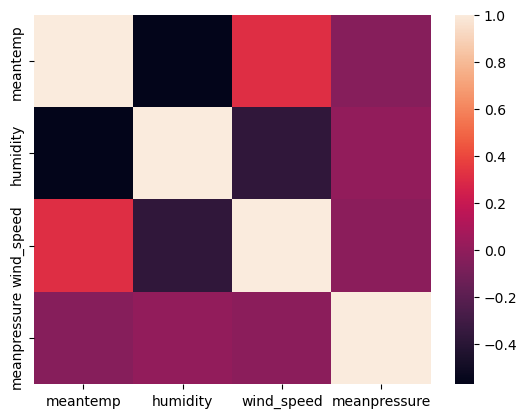

In [188]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr = df_train.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

## Plot examples

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Temperature

In [190]:
ts_meantemp = df_train[['date','meantemp']]
ts_meantemp = ts_meantemp.set_index('date')
ts_temperature = ts_meantemp.squeeze()
print(type(ts_temperature))
ts_temperature

<class 'pandas.core.series.Series'>


date
2013-01-01   -2.109500
2013-01-02   -2.463454
2013-01-03   -2.495219
2013-01-04   -2.291015
2013-01-05   -2.654044
                ...   
2016-12-28   -1.126952
2016-12-29   -1.396406
2016-12-30   -1.551990
2016-12-31   -1.421654
2017-01-01   -2.109500
Name: meantemp, Length: 1462, dtype: float64

<Axes: title={'center': 'mean temperature of daily climate'}, xlabel='Date', ylabel='mean temperature'>

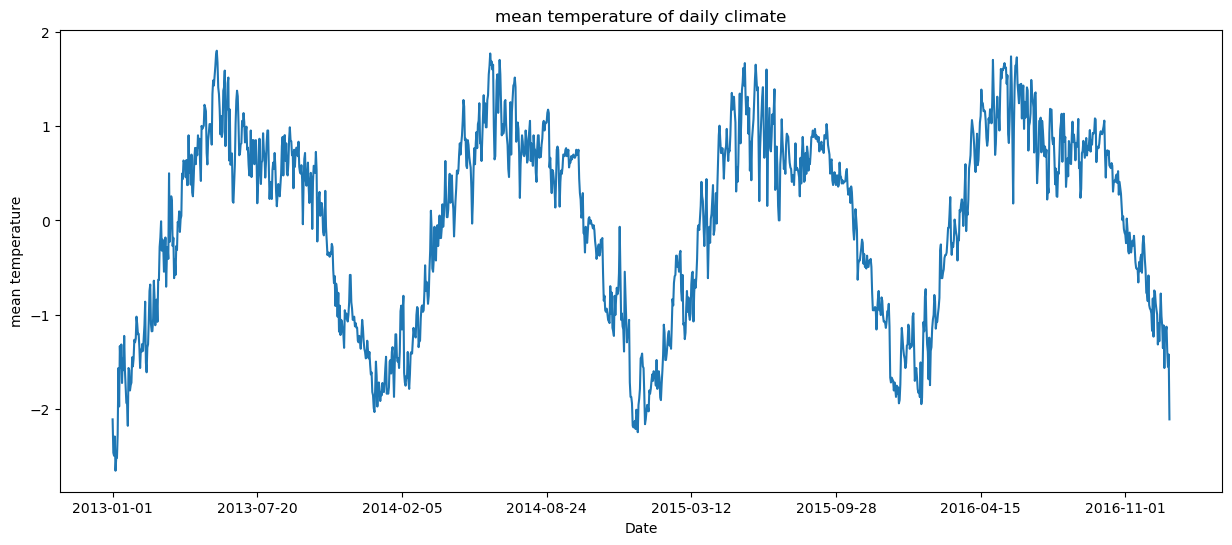

In [191]:
fig, ax = plt.subplots(figsize=(15,6))
ts_temperature.plot(xlabel="Date", ylabel="mean temperature", title="mean temperature of daily climate", ax=ax)

#### Week

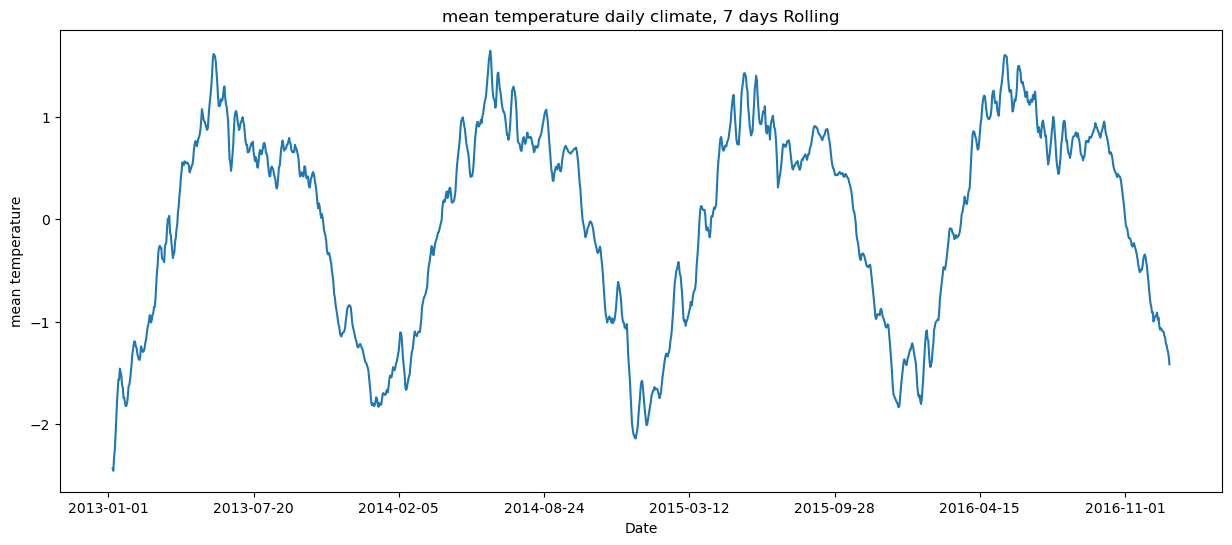

In [192]:
fig, ax = plt.subplots(figsize=(15,6))
ts_temperature.rolling(7).mean().plot(xlabel="Date", ylabel="mean temperature", title="mean temperature daily climate, 7 days Rolling", ax=ax);

#### Month

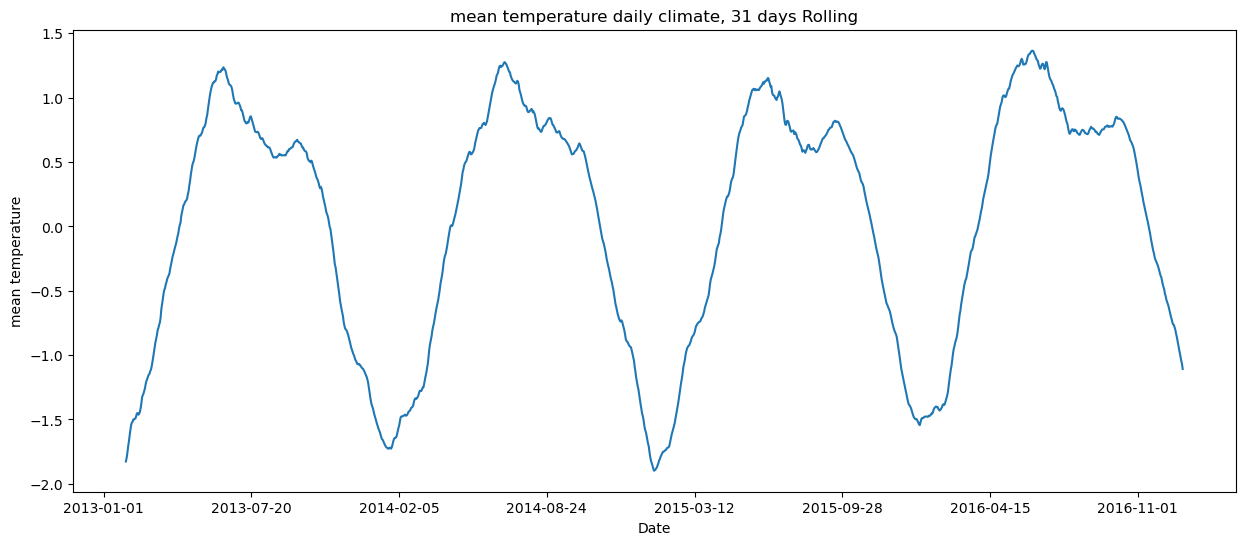

In [193]:
fig, ax = plt.subplots(figsize=(15,6))
ts_temperature.rolling(31).mean().plot(xlabel="Date", ylabel="mean temperature", title="mean temperature daily climate, 31 days Rolling", ax=ax);

#### Autocorrelation

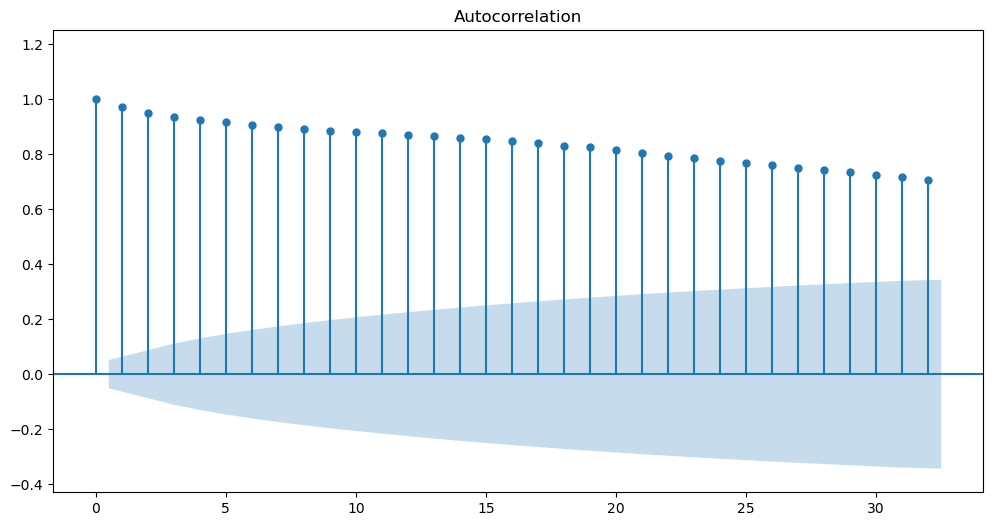

In [194]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(12,6))
plot_acf(ts_temperature, ax=ax, fft=True, auto_ylims=True);

#### Model-fitting approaches

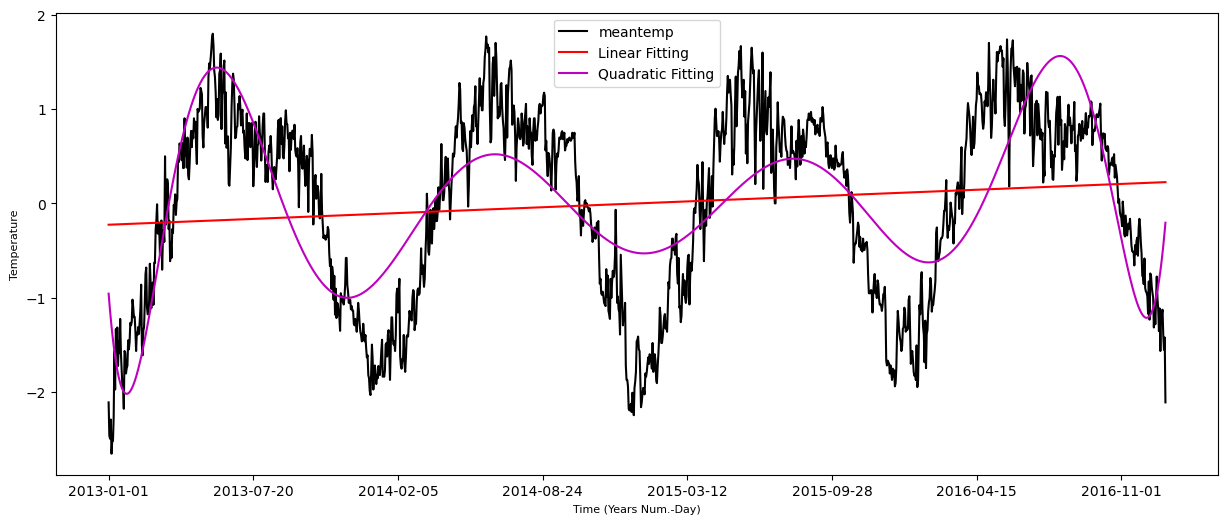

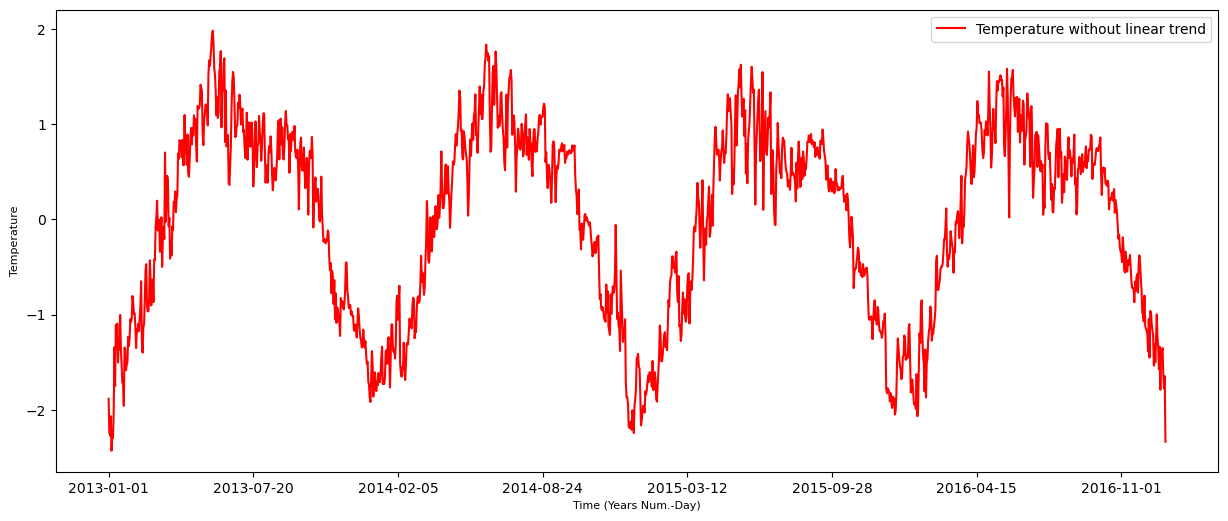

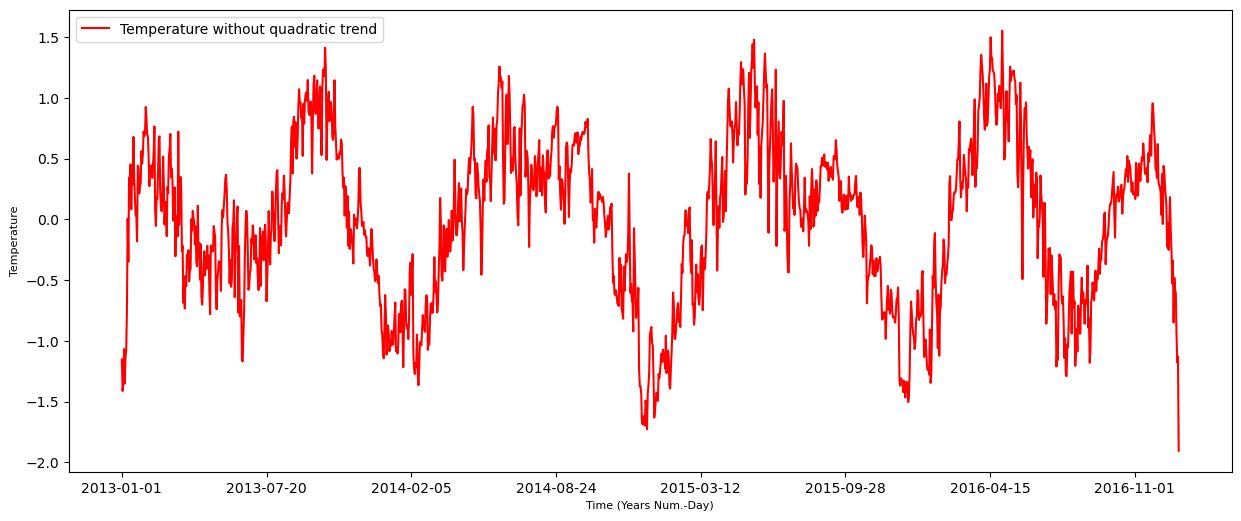

In [195]:
tDays=np.array(range(ts_temperature.shape[0]))

#Linear trend estimation by fitting
coefs=np.polyfit(tDays,np.array(ts_temperature),1)
linVals=np.polyval(coefs,tDays)
linTS=pd.Series(data=linVals,index=ts_temperature.index,name="Linear Fitting")

#Quadratic trend estimation by fitting
coefs=np.polyfit(tDays,np.array(ts_temperature),10)
quadVals=np.polyval(coefs,tDays)
quadTS=pd.Series(data=quadVals,index=ts_temperature.index,name="Quadratic Fitting")

plt.figure(figsize=(15,6))
ax=ts_temperature.plot(legend=True,color='k')
linTS.plot(ax=ax,legend=True,color='r')
quadTS.plot(ax=ax,legend=True,color='m')
ax.set_ylabel('Temperature',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})
plt.show()
#Remove linear trend

plt.figure(figsize=(15,6))
TTsNoLinTrend=ts_temperature-linTS
TTsNoLinTrend.name="Temperature without linear trend"
ax2=TTsNoLinTrend.plot(legend=True,color='r')
ax2.set_ylabel('Temperature',fontdict={'fontsize':8})
ax2.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})
plt.show()
#Remove quadraic trend

plt.figure(figsize=(15,6))
TTsNoQuadTrend=ts_temperature-quadTS
TTsNoQuadTrend.name="Temperature without quadratic trend"
ax3=TTsNoQuadTrend.plot(legend=True,color='r')
ax3.set_ylabel('Temperature',fontdict={'fontsize':8})
ax3.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})
plt.show()

#### Local smoothing approaches 

Text(0.5, 0, 'Time (Years)')

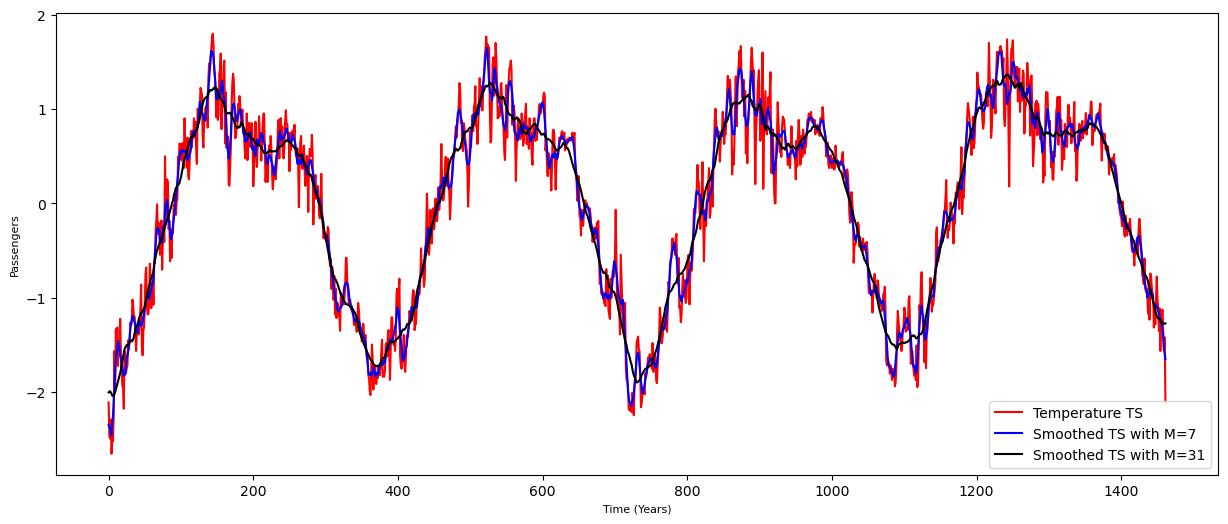

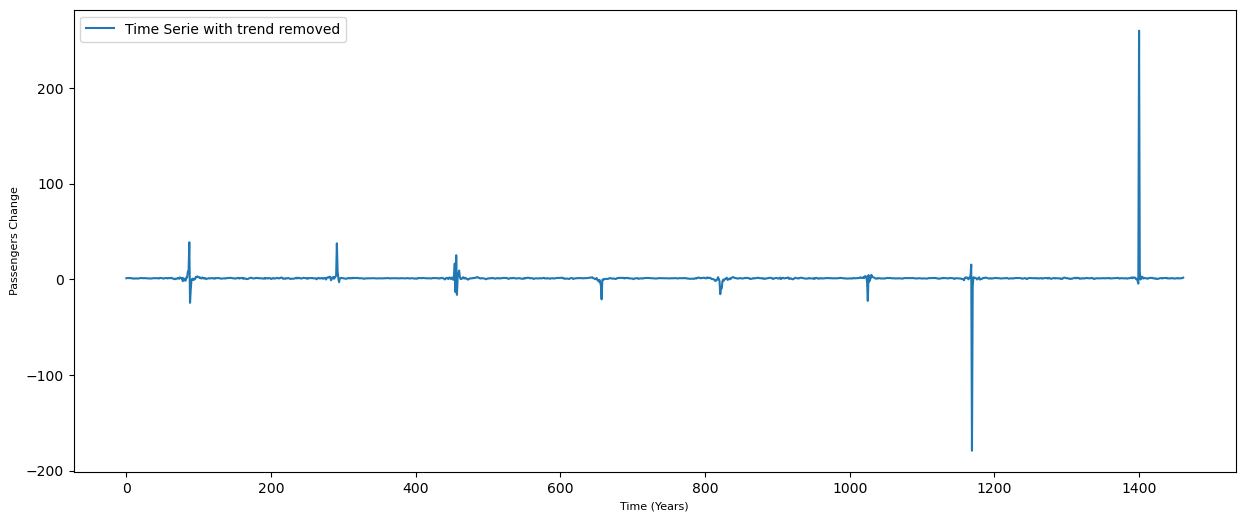

In [196]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def maSmooth(TSeries,omega,data_aug=False):
    M=omega.shape[0]
    lag=int(np.floor((M-1)/2))
    
    if data_aug: #If smooted TS should have the same number of samples
        TSeriesAug=pd.concat([np.flip(TSeries[0:lag]), TSeries, np.flip(TSeries[-lag:])])
    else:
        TSeriesAug=TSeries
        
    nf=range(lag,TSeriesAug.size-lag)
    xf=np.zeros(TSeriesAug.size-2*(lag)).astype('float')
    for n in nf:
        xf[n-lag]=(1/float(sum(omega)))*np.sum(np.multiply(TSeriesAug[n-lag:n+lag+1],omega))
    xf=pd.Series(data=xf, index=TSeriesAug.index[lag:TSeriesAug.size-lag],name="Smoothed TS with M="+str(M))
    
    return xf

TTTS=pd.Series(data=np.array(ts_temperature),index=tDays,name="Temperature TS")

M=5
omega=np.ones(M)*(1/float(M))    
smooth5=maSmooth(TTTS,omega,data_aug=True)

M=7
omega=np.ones(M)*(1/float(M))
smooth7=maSmooth(TTTS,omega,data_aug=True)

M=31
omega=np.ones(M)*(1/float(M))
smooth31=maSmooth(TTTS,omega,data_aug=True)

plt.figure(figsize=(15,6))

ax=TTTS.plot(color='r',legend=True)
#smooth5.plot(color='b',legend=True)
smooth7.plot(color='b',legend=True)
smooth31.plot(color='k',legend=True)
ax.set_ylabel('Passengers',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})


plt.figure(figsize=(15,6))

psNoTrend=TTTS/smooth31
psNoTrend.name="Time Serie with trend removed"
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('Passengers Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})

Text(0.5, 0, 'Time (Years)')

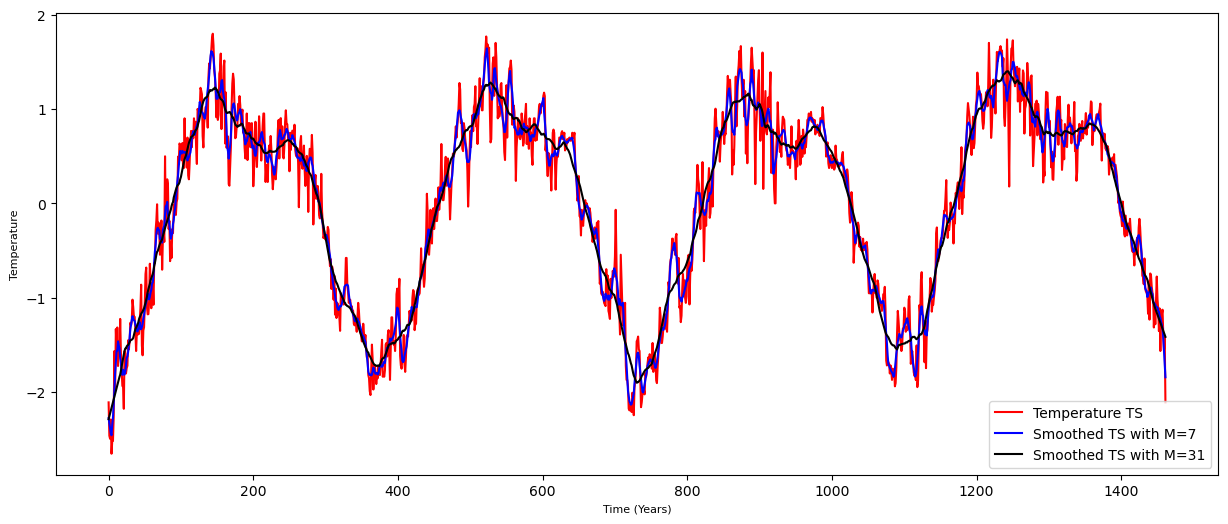

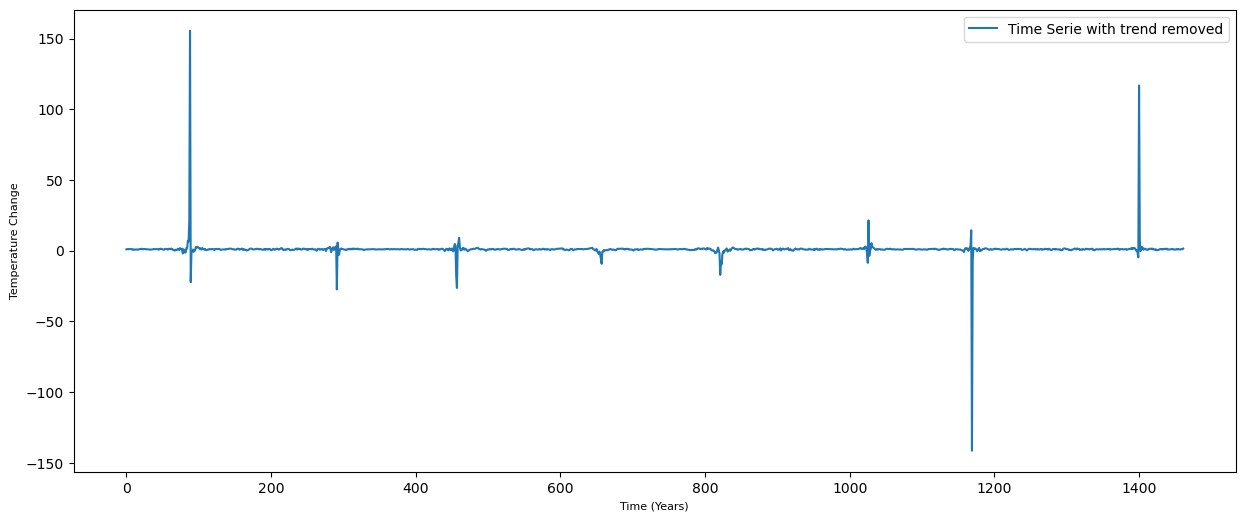

In [197]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def flin(x,a,b):
    return a*x+b

def xWeights(x,xi,span):
    wi=(1-abs((x-xi)/float(span))**3)**3
    #plt.figure()
    #plt.plot(wi)
    return wi

def yWeights(ri,MAD):
    if np.abs(ri)<6*MAD:
        return (1-((ri/(6*MAD))**2))**2
    else:
        return 0


def loessPass(TSeries,TSeriesE=pd.Series(np.array([])),span=5,timePass=True):
    lag=int((span-1)/2)
    xf=np.zeros(TSeries.size).astype('float')
    for k in range(TSeries.size):
        if k<lag:
            win=TSeries[0:span]
            if not timePass:
                winE=TSeriesE[0:span]
            xvs=np.array(range(span))
            #print "No inicio"
        elif k>=TSeries.size-lag:
            #print "No fim"
            win=TSeries[TSeries.size-span:]
            if not timePass:
                winE=TSeriesE[TSeriesE.size-span:]
            xvs=np.array(range(TSeries.size-span,TSeries.size))
        else:
            #print "No meio"
            win=TSeries[k-lag:k+lag+1]
            if not timePass:
                winE=TSeriesE[k-lag:k+lag+1]
            xvs=np.array(range(k-lag,k+lag+1))

        ws=np.zeros(span).astype('float')
            
        if not timePass:
            res=np.array(win-winE)
            #res=res.as_matrix()
            MAD=np.median(np.abs(res))
            
        for xw in range(len(xvs)):
            if timePass:
                ws[xw]=xWeights(k,xvs[xw],np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1]))))
            else:
                ws[xw]=yWeights(res[xw],MAD)
            #print np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1])))
        exog = sm.add_constant(xvs)
        
        mod_wls = sm.WLS(win, exog, weights=ws)
        res_wls = mod_wls.fit()
        
        xf[k]=res_wls.params[1]*k + res_wls.params[0]
    return xf

def lowess(TSeries,span=5,ftype='linear'):
    
    xf=loessPass(TSeries,span=span,timePass=True)
    xf=loessPass(TSeries,TSeriesE=pd.Series(data=xf, index=TSeries.index),span=span,timePass=False)
    xf=pd.Series(data=xf, index=TSeries.index,name="Smoothed TS with M="+str(M))
    return xf


M=5
smooth5=lowess(TTTS)

M=7
smooth7=lowess(TTTS,span=M)

M=31
smooth31=lowess(TTTS,span=M)

plt.figure(figsize=(15,6))

ax=TTTS.plot(color='r',legend=True)
smooth7.plot(color='b',legend=True)
smooth31.plot(color='k',legend=True)
ax.set_ylabel('Temperature',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})


plt.figure(figsize=(15,6))

TTNoTrend=TTTS/smooth31
TTNoTrend.name="Time Serie with trend removed"
ax=TTNoTrend.plot(legend=True)
ax.set_ylabel('Temperature Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})

#### Seasonality

Text(0, 0.5, 'Normalized Power Spectrum (A.U.)')

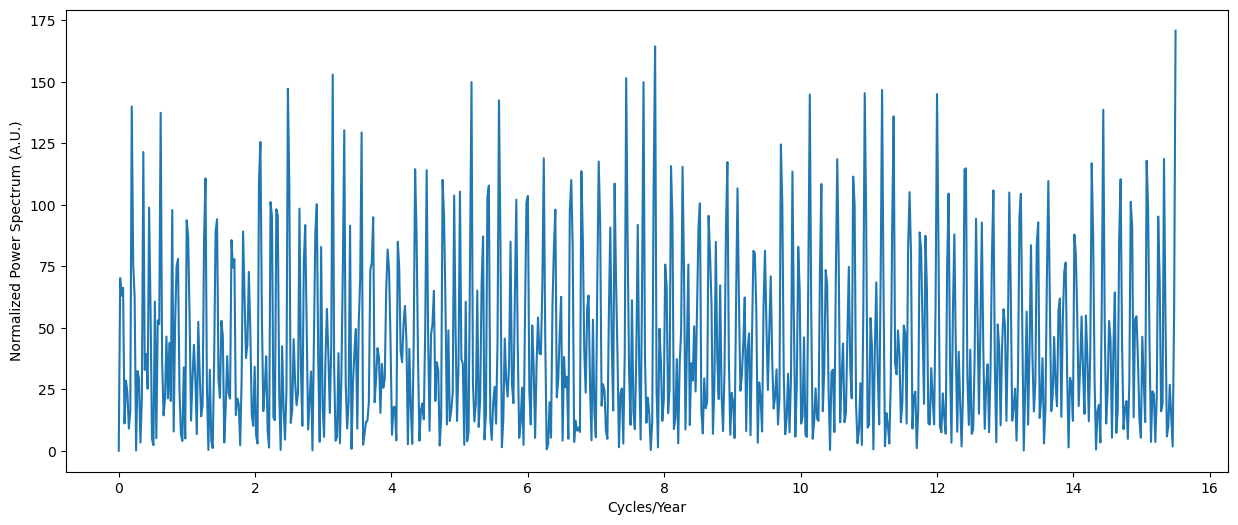

In [198]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



fTS=(np.abs(np.fft.rfft(TTNoTrend-TTNoTrend.mean()))**2/TTNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=31# samples/month
f=np.fft.rfftfreq(TTNoTrend.size, d=1/samp_freq)
plt.figure(figsize=(15,6))
plt.plot(f,fTS)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")

##### Seasonality assessment by filtering

Text(0.5, 0, 'Time (Years)')

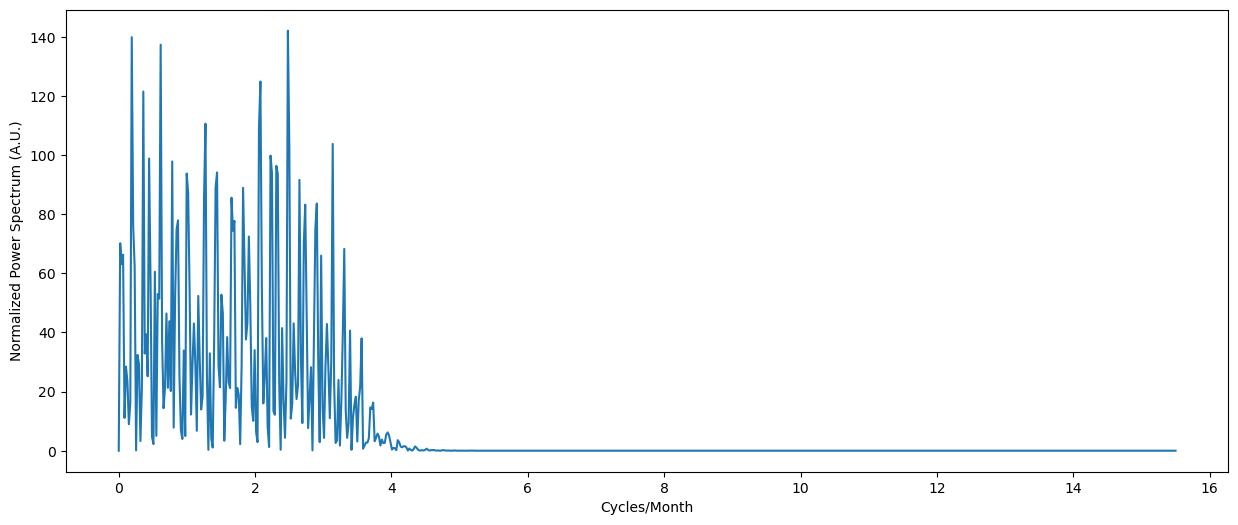

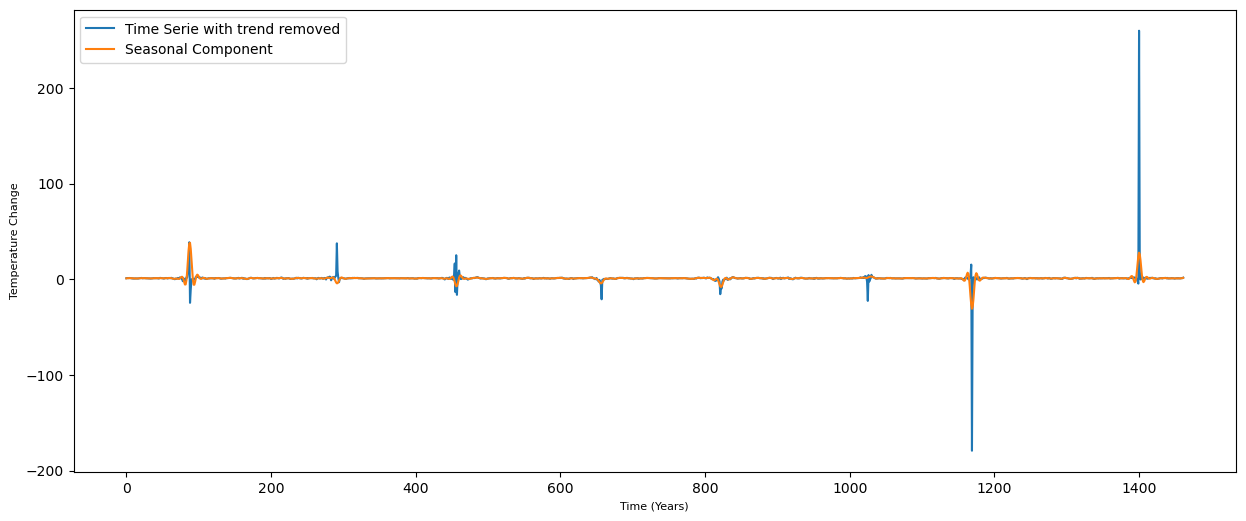

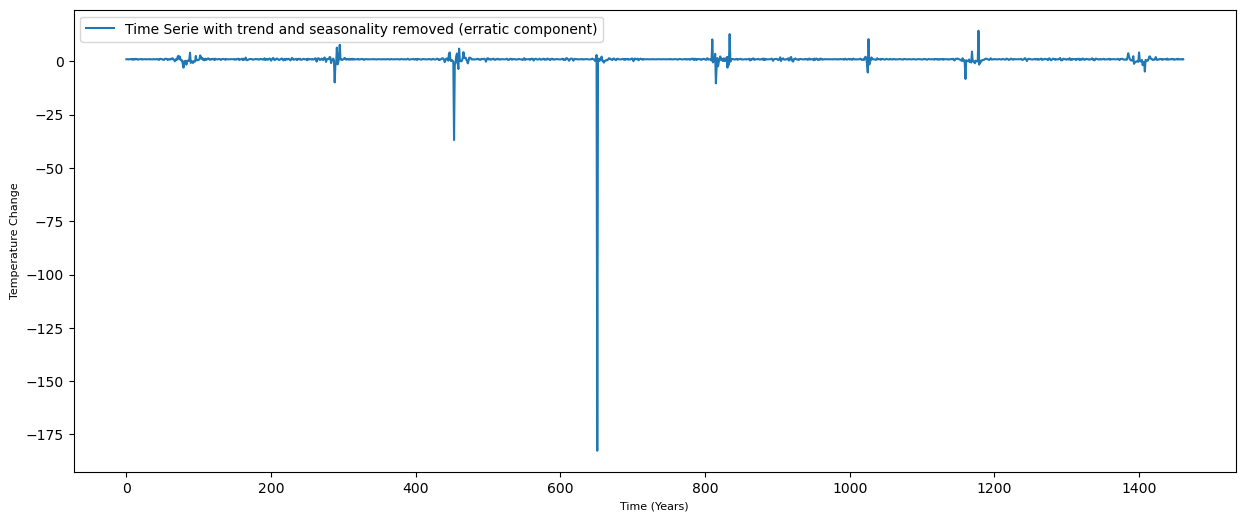

In [199]:
import scipy.signal as scs


sos=scs.butter(N=5,fs=12,Wn=[1.4],btype='lowpass',output='sos')

Seasonal = scs.sosfiltfilt(sos,TTNoTrend)


#Lets look at the filter effect
fTS=(np.abs(np.fft.rfft(Seasonal-np.mean(Seasonal)))**2/TTNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=31 #12 samples/year
f=np.fft.rfftfreq(TTNoTrend.size, d=1/samp_freq)
plt.figure(figsize=(15,6))
plt.plot(f,fTS)
plt.xlabel("Cycles/Month")
plt.ylabel("Normalized Power Spectrum (A.U.)")


#Plot Seasonal component as compared with the TS without trend
SeaTS=pd.Series(data=Seasonal,index=TTTS.index,name="Seasonal Component")
plt.figure(figsize=(15,6))
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('Temperature Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
SeaTS.plot(legend=True)

#Remove seasonal component by assuming the multiplicative model
TTNoTrendNoSeas=TTNoTrend/SeaTS
TTNoTrendNoSeas.name="Time Serie with trend and seasonality removed (erratic component)"

plt.figure(figsize=(15,6))
ax=TTNoTrendNoSeas.plot(legend=True)
ax.set_ylabel('Temperature Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})




#### Trend and seasonality removal by differencing

Text(0.5, 36.72222222222221, 'Time (Year Num.-Day)')

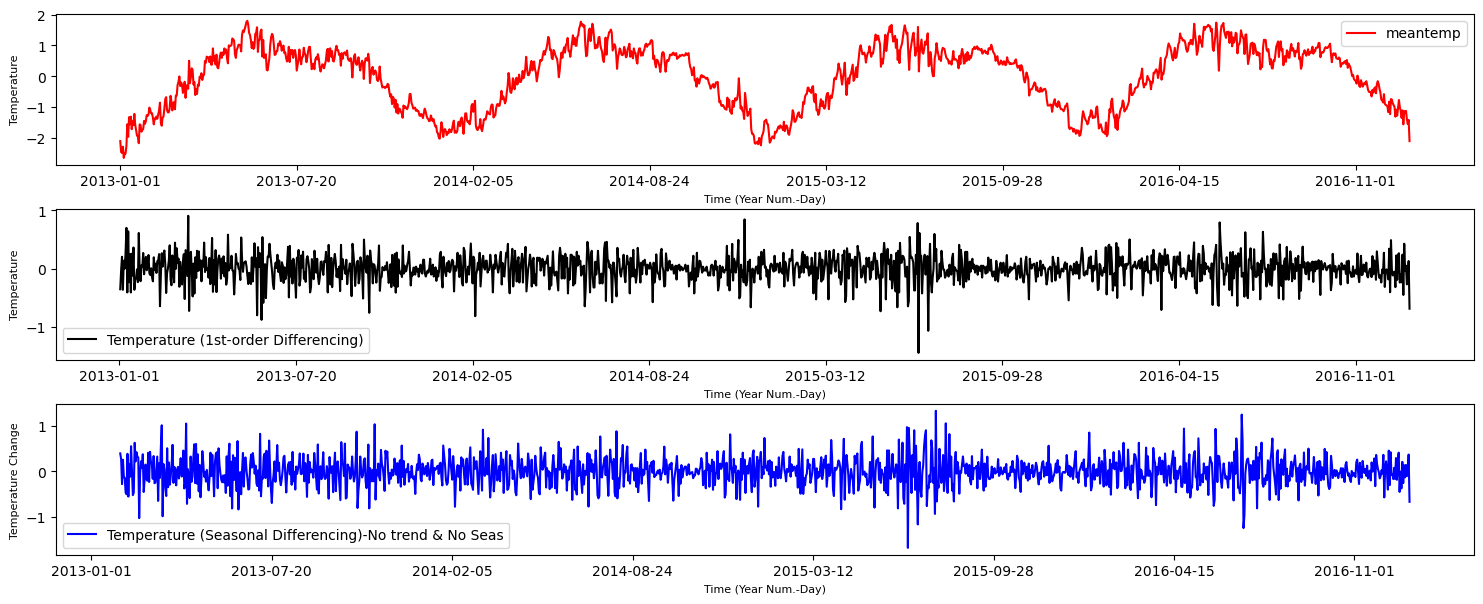

In [200]:
fig, axs=plt.subplots(3, figsize=(15,6))
fig.tight_layout()
ts_temperature.plot(ax=axs[0],legend=True,color='r')
axs[0].set_ylabel('Temperature',fontdict={'fontsize':8})
axs[0].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

d1T_TS=ts_temperature.diff()
d1T_TS.name="Temperature (1st-order Differencing)"
d1T_TS.plot(ax=axs[1],legend=True,color='k')
axs[1].set_ylabel('Temperature',fontdict={'fontsize':8})
axs[1].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

d1psTS=d1T_TS.diff(31)
d1psTS.name="Temperature (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[2],legend=True,color='b')
axs[2].set_ylabel('Temperature Change',fontdict={'fontsize':8})
axs[2].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

#### Autocorrelation & Correlogram

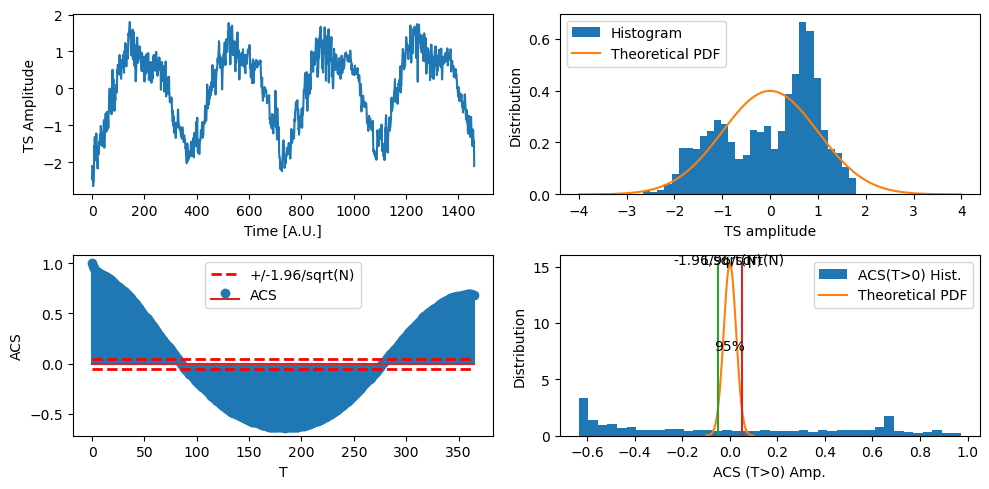

In [201]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spyst


def autocov(timeserie,T=0):
    N=timeserie.size
    mu=timeserie.mean()
    covCoef=0
    for n in range(0,N-T-1):
        covCoef=covCoef+(timeserie[n]-mu)*(timeserie[n+T]-mu)
    return covCoef/float(np.abs(N))
        

def autocoef(timeserie,T=0):
    return autocov(timeserie,T)/autocov(timeserie)

def correlogram(timeserie,maxT,twoside=False):
    N=timeserie.size
    if twoside:
        corrl=np.zeros(2*maxT+1)
        ix=np.array(range(maxT+1))
        ix=np.concatenate((-np.flip(ix[1:]),ix),axis=0)
    else:
        corrl=np.zeros(maxT+1)  
        ix=np.array(range(maxT+1))
    
    for i in range(maxT+1):
        if twoside:
            corrl[i+maxT]=autocoef(timeserie,i);
            if i>0:
                corrl[maxT-i]=corrl[i+maxT]
        else:
            corrl[i]=autocoef(timeserie,i);
    d = {'ACS':corrl, 'upsig':np.ones(maxT+1)*(1.96/np.sqrt(N)),'dnsig':-np.ones(maxT+1)*(1.96/np.sqrt(N))}
    corrl=pd.DataFrame(data=d,index=ix)
    return corrl
#================================================================

N = TTTS.size

figs,axs=plt.subplots(2,2, tight_layout=True)
TTTS.plot(ax=axs[0,0],figsize=(10,5))
axs[0,0].set_xlabel("Time [A.U.]")
axs[0,0].set_ylabel("TS Amplitude")



axs[0,1].hist(TTTS,bins=30,density=True,label='Histogram')
y2 = spyst.norm.pdf(np.arange(-4,4,0.01),0,1)
axs[0,1].plot(np.arange(-4,4,0.01),y2,label='Theoretical PDF')

#axs[1].legend('White noise ACS')
axs[0,1].set_xlabel("TS amplitude")
axs[0,1].set_ylabel("Distribution")
axs[0,1].legend()


corrl=correlogram(TTTS,maxT=int(N/4))

corrl.name='White noise ACS'
axs[1,0].stem(corrl.index,corrl['ACS'],label='ACS')
axs[1,0].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2,label='+/-1.96/sqrt(N)')
axs[1,0].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('White noise ACS')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("ACS")
axs[1,0].legend()



axs[1,1].hist(corrl['ACS'][1:],bins=40,density=True,label='ACS(T>0) Hist.')

rg=np.arange(-0.1,0.1,0.001)
pdf = spyst.norm.pdf(rg,0,1/np.sqrt(N))
cdf = spyst.norm.cdf(rg,0,1/np.sqrt(N))

aix005=np.where(cdf>=0.025)
ix005=aix005[0][0]
aix095=np.where(cdf>=0.975)
ix095=aix095[0][0]

axs[1,1].plot(rg,pdf,label='Theoretical PDF')
axs[1,1].plot([rg[ix005],rg[ix005]],[0,np.max(pdf)])
axs[1,1].plot([rg[ix095],rg[ix095]],[0,np.max(pdf)])
axs[1,1].text(rg[ix005],np.max(pdf),"-1.96/sqrt(N)",horizontalalignment="center")
axs[1,1].text(rg[ix095],np.max(pdf),"1.96/sqrt(N)",horizontalalignment="center")
axs[1,1].text(0,np.max(pdf)/2,"95%",horizontalalignment="center")
#axs[1].legend('White noise ACS')
axs[1,1].set_xlabel("ACS (T>0) Amp.")
axs[1,1].set_ylabel("Distribution")
axs[1,1].legend()



Text(0, 0.5, 'Autocorrelation')

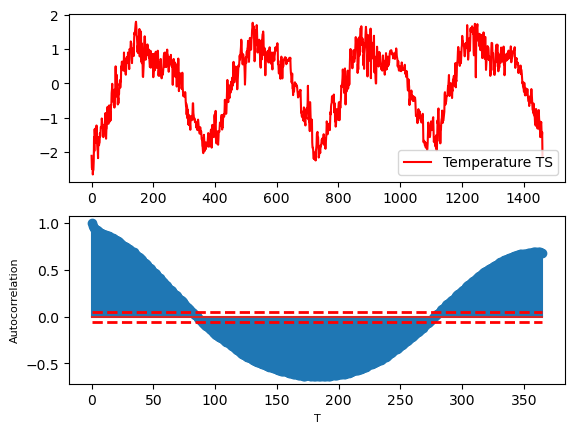

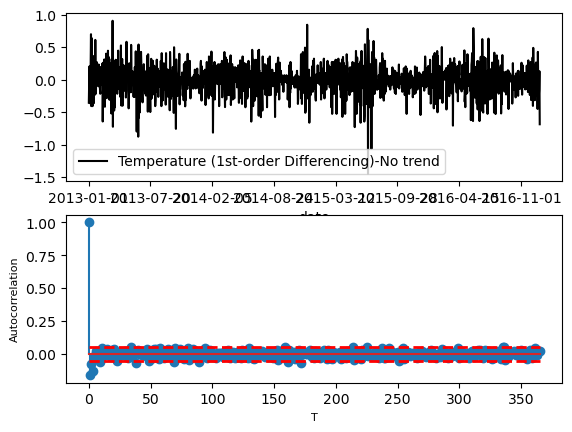

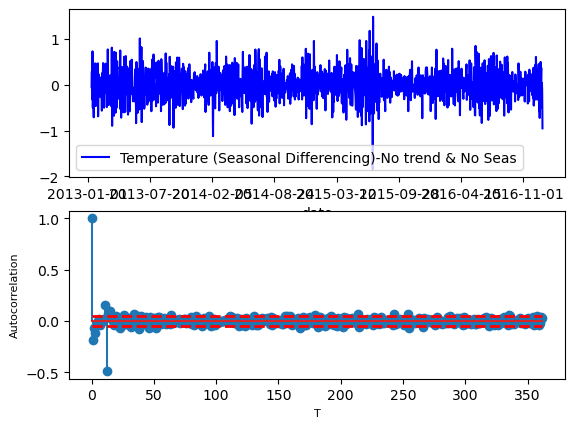

In [202]:
def autocov(timeserie,T=0):
    N=timeserie.size
    mu=timeserie.mean()
    covCoef=0
    for n in range(0,N-T-1):
        covCoef=covCoef+(timeserie[n]-mu)*(timeserie[n+T]-mu)
    return covCoef/float(np.abs(N))
        

def autocoef(timeserie,T=0):
    return autocov(timeserie,T)/autocov(timeserie)

# def correlogram(timeserie,maxT,twoside=False):
#     N=timeserie.size
#     if twoside:
#         corrl=np.zeros(2*maxT+1)
#         ix=np.array(range(maxT+1))
#         ix=np.concatenate((-np.flip(ix[1:]),ix),axis=0)
#     else:
#         corrl=np.zeros(maxT+1)  
#         ix=np.array(range(maxT+1))
    
#     for i in range(maxT+1):
#         if twoside:
#             corrl[i+maxT]=autocoef(timeserie,i);
#             if i>0:
#                 corrl[maxT-i]=corrl[i+maxT]
#         else:
#             corrl[i]=autocoef(timeserie,i);
#     d = {'ACS':corrl, 'upsig':np.ones(maxT+1)*(1.96/np.sqrt(N)),'dnsig':-np.ones(maxT+1)*(1.96/np.sqrt(N))}
#     corrl=pd.DataFrame(data=d,index=ix)
#     return corrl


#Raw
fig, axs=plt.subplots(2)
TTTS.plot(ax=axs[0],legend=True,color='r')
plt.ylabel('Temperature',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=TTTS.size
corrl=correlogram(TTTS,maxT=int(N/4))
corrl.name='Temperature ACS (Raw)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('Airline Pass. ACS (Raw)')
plt.xlabel("T")
plt.ylabel("Autocorrelation")

#No trend-1st order diff
fig, axs=plt.subplots(2)

d1psTS=ts_temperature.diff()
d1psTS.name="Temperature (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[0],legend=True,color='k')
plt.ylabel('Temperature Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Temperature ACS (No trend)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('Airline Pass. ACS (No trend)')
plt.xlabel("T")
plt.ylabel("Autocorrelation")

#No trend-1st order diff and no seasonality (seas. diff)
fig, axs=plt.subplots(2)

d1psTS=d1psTS.diff(12)
d1psTS.name="Temperature (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[0],legend=True,color='b')
plt.ylabel('Temperature Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Temperature ACS (No trend & No Seas.)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('Airline Pass. ACS (No trend & No Seas.)')
plt.xlabel("T")
plt.ylabel("Autocorrelation")

##### Week

<Axes: xlabel='Samples', ylabel='Var.'>

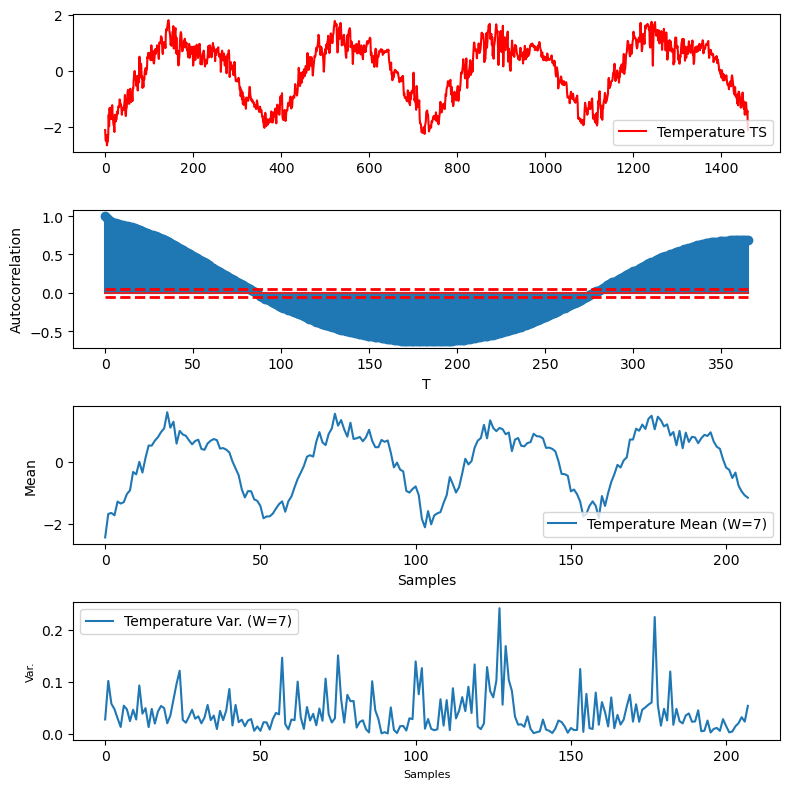

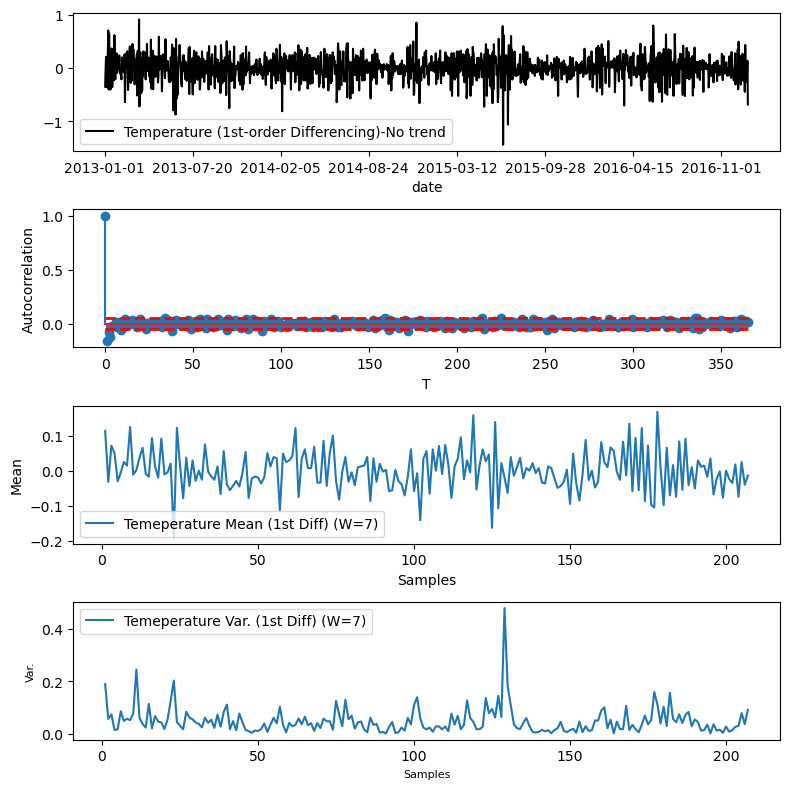

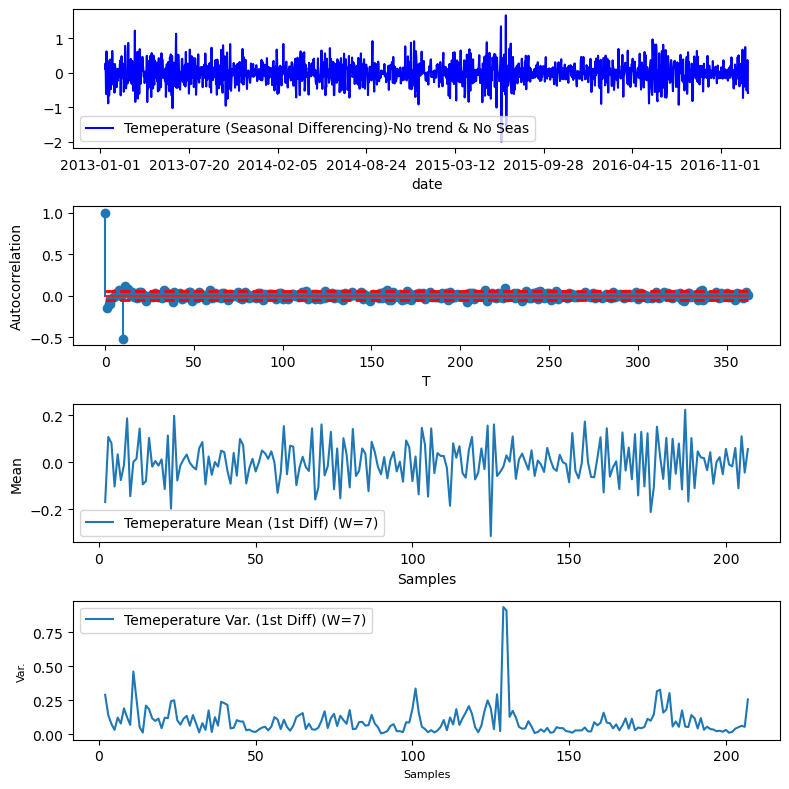

In [203]:
def meanvarWtime(timeseries,W):
    Nwin=int(np.floor(timeseries.size/W))
    vals=timeseries.to_numpy()
    vals=vals[0:int(Nwin*W)]
    mvals=vals.reshape((Nwin,W))
    return {'mu':np.mean(mvals,axis=1),'var':np.var(mvals,axis=1)}


#Raw
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

TTTS.plot(ax=axs[0],legend=True,color='r')
plt.ylabel('Temeperature',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=TTTS.size
corrl=correlogram(TTTS,maxT=int(N/4))
corrl.name='Temeperature ACS (Raw)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


Win=7 #Compute mean 
meanpsTSSeries=meanvarWtime(TTTS,W=Win)['mu']
meanTS=pd.Series(data=meanpsTSSeries,index=np.array(range(meanpsTSSeries.size)),name="Temperature Mean (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

varpsTSSeries=meanvarWtime(TTTS,W=Win)['var']
varTS=pd.Series(data=varpsTSSeries,index=np.array(range(varpsTSSeries.size)),name="Temperature Var. (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)






#No trend-1st order diff
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=ts_temperature.diff()
d1psTS.name="Temperature (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[0],legend=True,color='k')
plt.ylabel('Temperature Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Temeperature ACS (No trend)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Temeperature Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Temeperature Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#No trend-1st order diff and no seasonality (seas. diff)
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=d1psTS.diff(10)
d1psTS.name="Temeperature (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[0],legend=True,color='b')
plt.ylabel('Temeperature Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Temeperature ACS (No trend & No Seas.)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Temeperature Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Temeperature Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

##### Month

<Axes: xlabel='Samples', ylabel='Var.'>

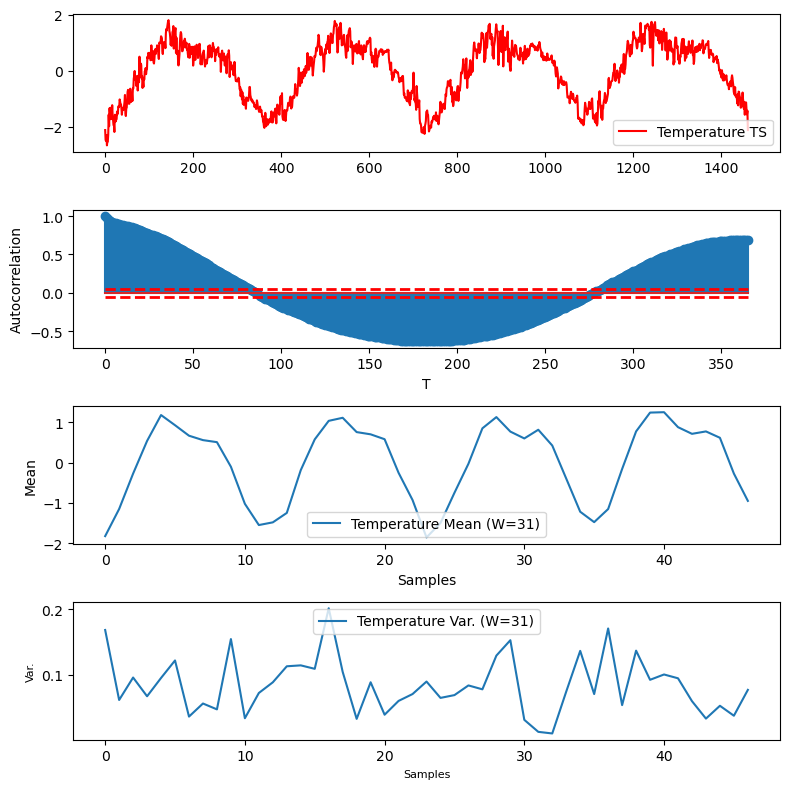

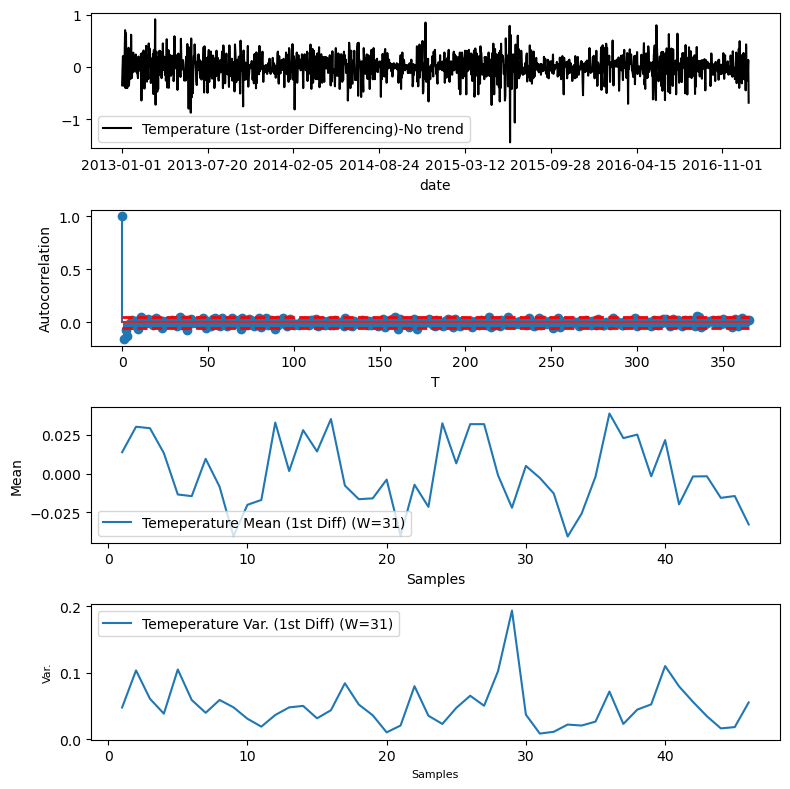

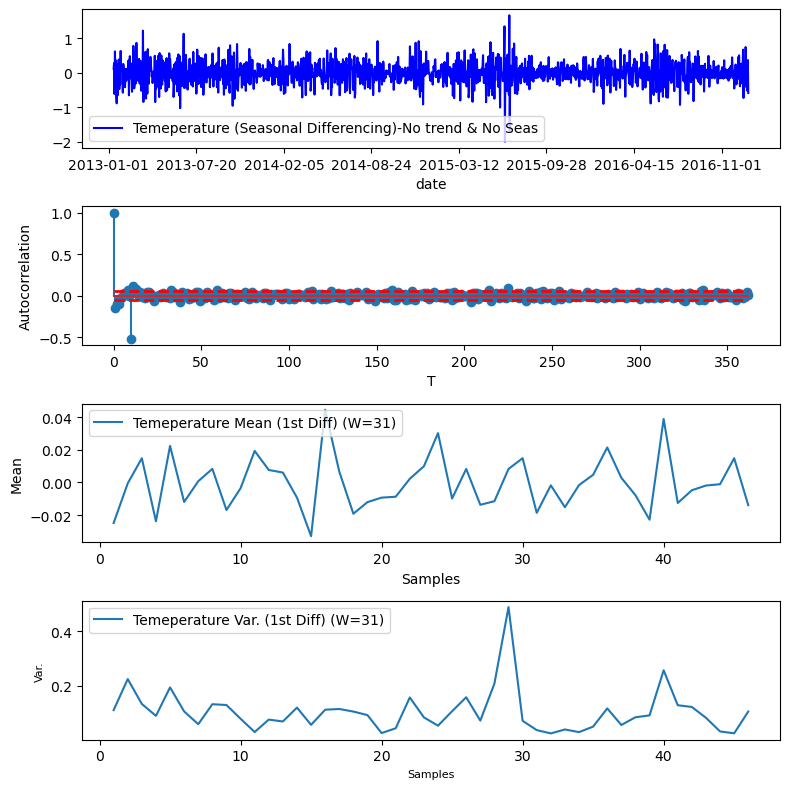

In [204]:
def meanvarWtime(timeseries,W):
    Nwin=int(np.floor(timeseries.size/W))
    vals=timeseries.to_numpy()
    vals=vals[0:int(Nwin*W)]
    mvals=vals.reshape((Nwin,W))
    return {'mu':np.mean(mvals,axis=1),'var':np.var(mvals,axis=1)}


#Raw
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

TTTS.plot(ax=axs[0],legend=True,color='r')
plt.ylabel('Temeperature',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=TTTS.size
corrl=correlogram(TTTS,maxT=int(N/4))
corrl.name='Temeperature ACS (Raw)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


Win=31 #Compute mean 
meanpsTSSeries=meanvarWtime(TTTS,W=Win)['mu']
meanTS=pd.Series(data=meanpsTSSeries,index=np.array(range(meanpsTSSeries.size)),name="Temperature Mean (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

varpsTSSeries=meanvarWtime(TTTS,W=Win)['var']
varTS=pd.Series(data=varpsTSSeries,index=np.array(range(varpsTSSeries.size)),name="Temperature Var. (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)






#No trend-1st order diff
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=ts_temperature.diff()
d1psTS.name="Temperature (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[0],legend=True,color='k')
plt.ylabel('Temperature Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Temeperature ACS (No trend)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Temeperature Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Temeperature Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#No trend-1st order diff and no seasonality (seas. diff)
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=d1psTS.diff(10)
d1psTS.name="Temeperature (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[0],legend=True,color='b')
plt.ylabel('Temeperature Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Temeperature ACS (No trend & No Seas.)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Temeperature Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Temeperature Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#### Statistical approach - The unit root test

In [205]:
print("===============Temperature data (RAW)============")
#Raw
result=st.adfuller(TTTS)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
#No trend-1st order diff
print("===============Temperature  data (1st differencing)============")

d1psTS=ts_temperature.diff()

result=st.adfuller(d1psTS.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



#No trend-1st order diff and no seasonality (seas. diff)
print("===============Temperature  data (1st Differencing+Seasonal Differencing)============")

d1psTS=d1psTS.diff(10)

result=st.adfuller(d1psTS.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


===============Temperature data (RAW)============
ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
===============Temperature  data (1st differencing)============
ADF Statistic: -16.378720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
===============Temperature  data (1st Differencing+Seasonal Differencing)============
ADF Statistic: -14.004560
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


### Humidity

In [206]:
ts_humidity = df_train[['date', 'humidity']]
ts_humidity = ts_humidity.set_index('date')
ts_humidity = ts_humidity.squeeze()
print(type(ts_humidity))
ts_humidity

<class 'pandas.core.series.Series'>


date
2013-01-01    1.415439
2013-01-02    1.862828
2013-01-03    1.564569
2013-01-04    0.630022
2013-01-05    1.554627
                ...   
2016-12-28    0.433776
2016-12-29    1.615699
2016-12-30    1.723641
2016-12-31    1.564569
2017-01-01    2.340044
Name: humidity, Length: 1462, dtype: float64

<Axes: title={'center': 'humidity of daily climate'}, xlabel='Date', ylabel='humity'>

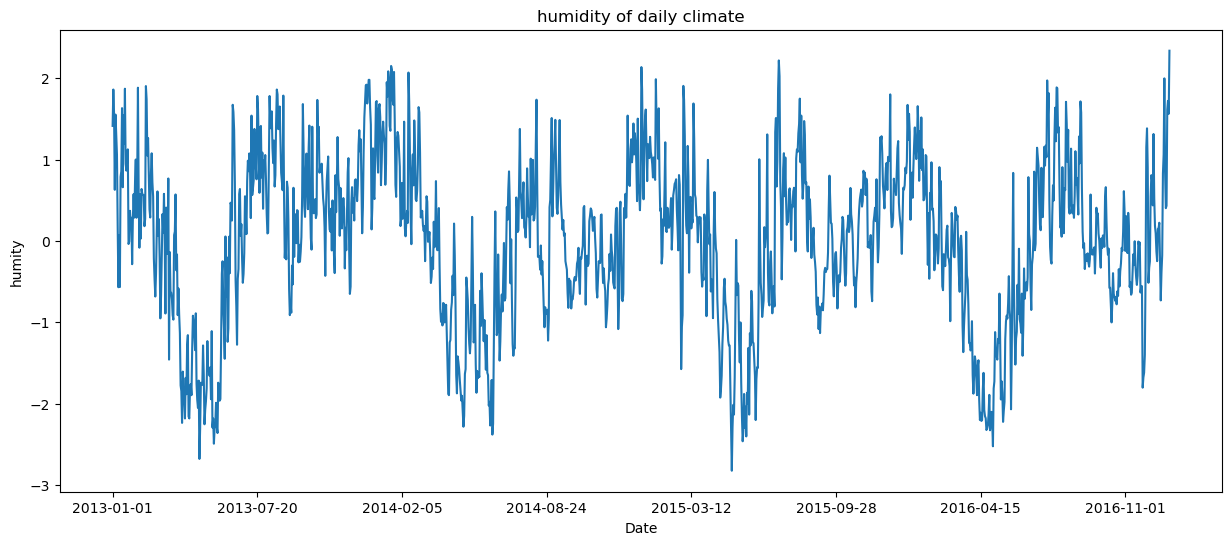

In [207]:
fig, ax = plt.subplots(figsize=(15,6))
ts_humidity.plot(xlabel="Date", ylabel="humity", title="humidity of daily climate", ax=ax)

#### Week

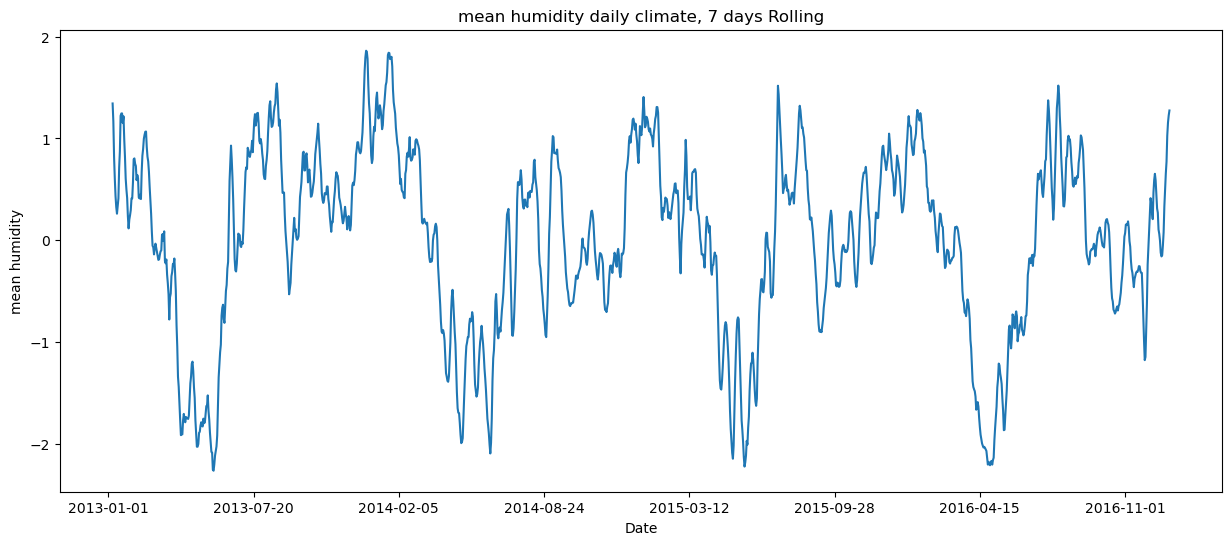

In [208]:
fig, ax = plt.subplots(figsize=(15,6))
ts_humidity.rolling(7).mean().plot(xlabel="Date", ylabel="mean humidity", title="mean humidity daily climate, 7 days Rolling", ax=ax);

#### Month

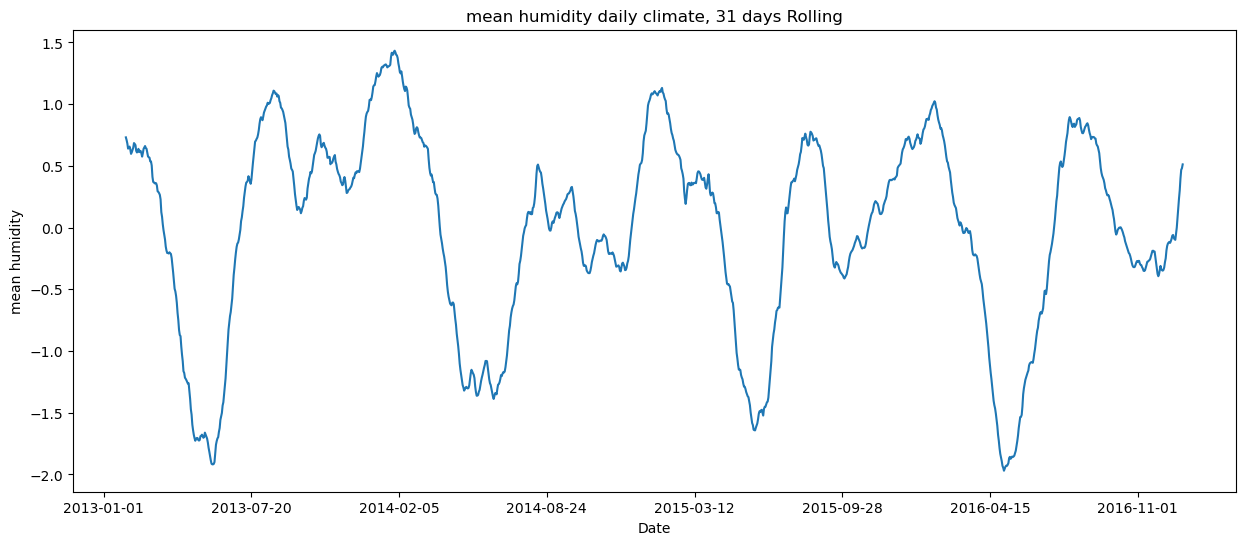

In [209]:
fig, ax = plt.subplots(figsize=(15,6))
ts_humidity.rolling(31).mean().plot(xlabel="Date", ylabel="mean humidity", title="mean humidity daily climate, 31 days Rolling", ax=ax);

#### Autocorrelation

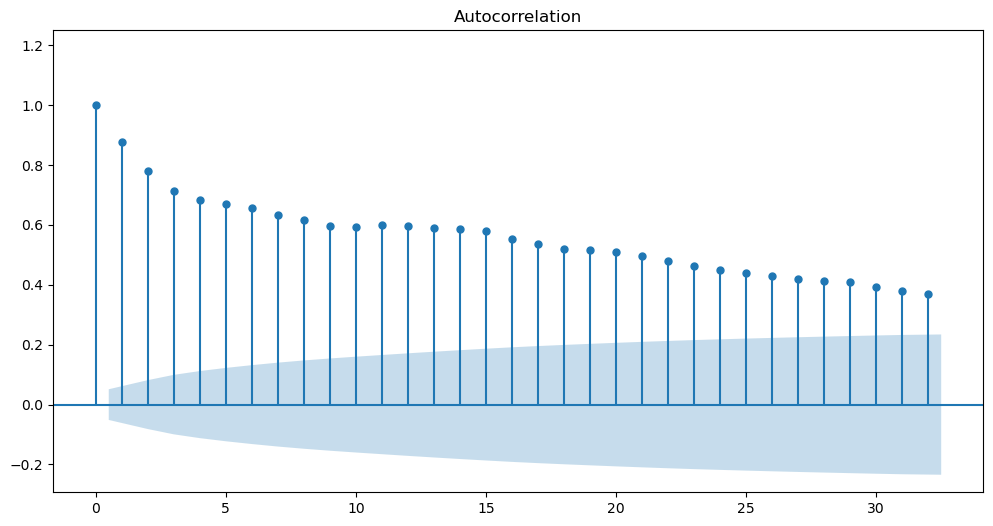

In [210]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(12,6))
plot_acf(ts_humidity, ax=ax, fft=True, auto_ylims=True);

#### Model-fitting approaches

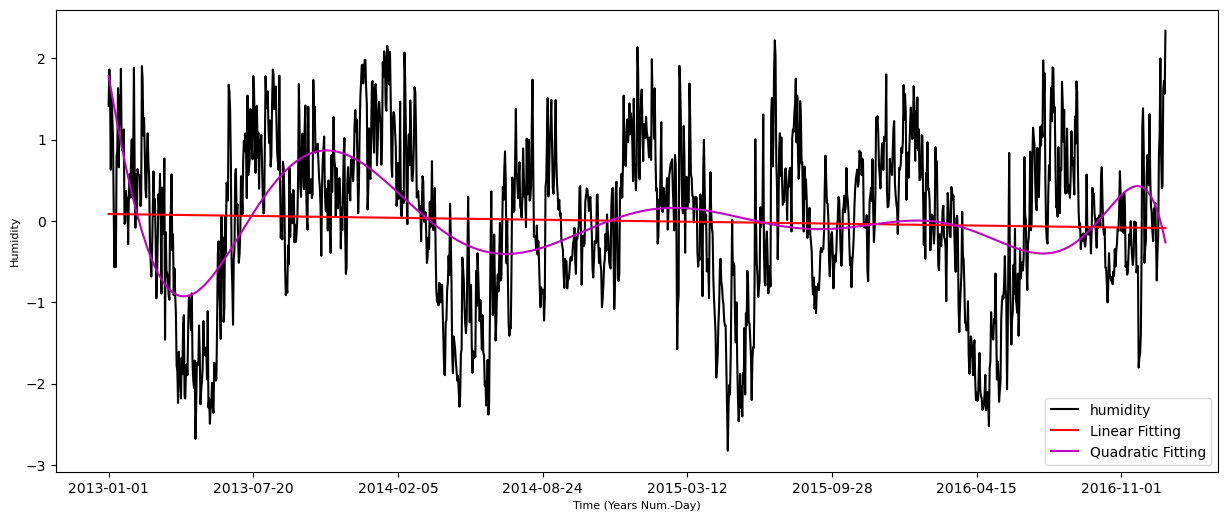

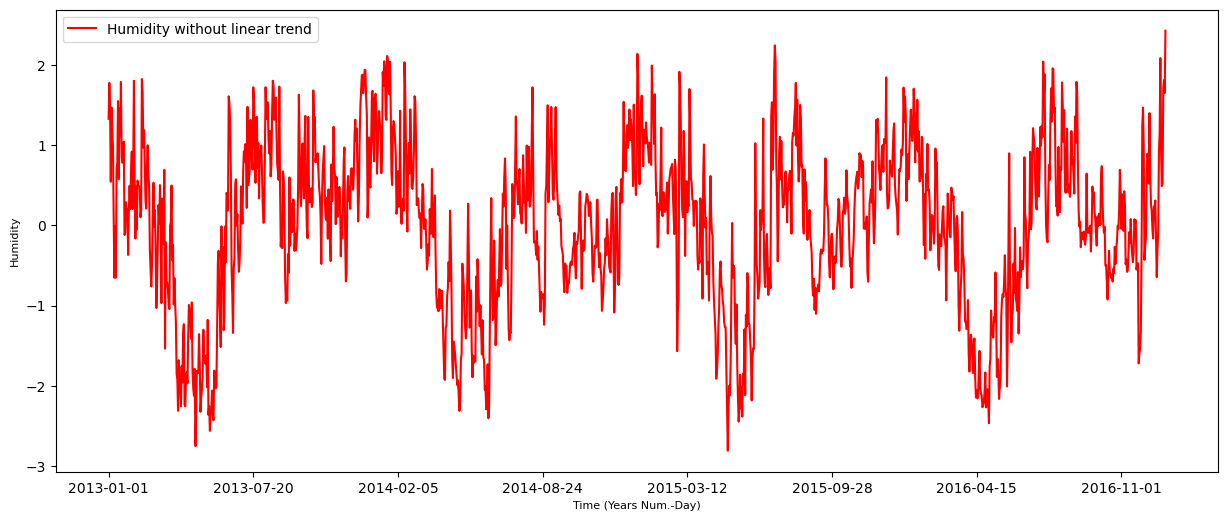

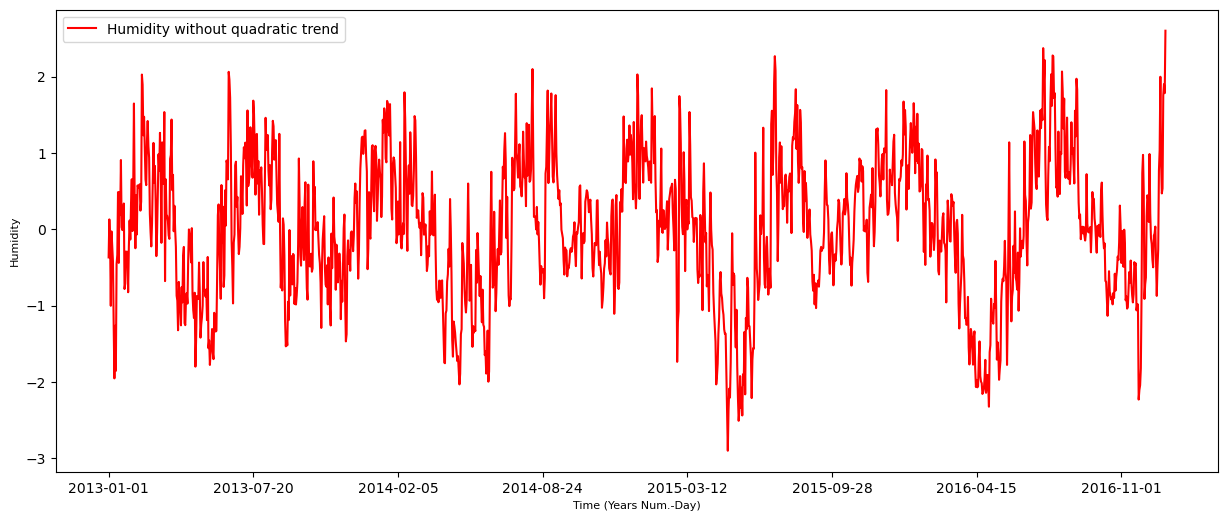

In [211]:
tDays=np.array(range(ts_humidity.shape[0]))

#Linear trend estimation by fitting
coefs=np.polyfit(tDays,np.array(ts_humidity),1)
linVals=np.polyval(coefs,tDays)
linTS=pd.Series(data=linVals,index=ts_humidity.index,name="Linear Fitting")

#Quadratic trend estimation by fitting
coefs=np.polyfit(tDays,np.array(ts_humidity),10)
quadVals=np.polyval(coefs,tDays)
quadTS=pd.Series(data=quadVals,index=ts_humidity.index,name="Quadratic Fitting")

plt.figure(figsize=(15,6))
ax=ts_humidity.plot(legend=True,color='k')
linTS.plot(ax=ax,legend=True,color='r')
quadTS.plot(ax=ax,legend=True,color='m')
ax.set_ylabel('Humidity',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})
plt.show()
#Remove linear trend

plt.figure(figsize=(15,6))
HsNoLinTrend=ts_humidity-linTS
HsNoLinTrend.name="Humidity without linear trend"
ax2=HsNoLinTrend.plot(legend=True,color='r')
ax2.set_ylabel('Humidity',fontdict={'fontsize':8})
ax2.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})
plt.show()
#Remove quadraic trend

plt.figure(figsize=(15,6))
HsNoQuadTrend=ts_humidity-quadTS
HsNoQuadTrend.name="Humidity without quadratic trend"
ax3=HsNoQuadTrend.plot(legend=True,color='r')
ax3.set_ylabel('Humidity',fontdict={'fontsize':8})
ax3.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})
plt.show()

#### Local smoothing approaches 

Text(0.5, 0, 'Time (Years)')

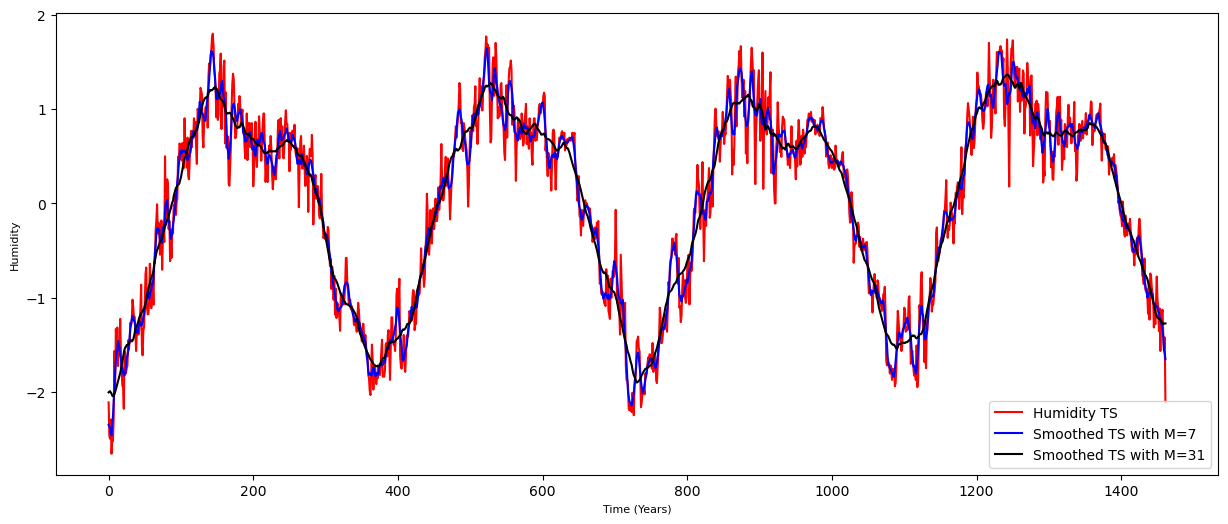

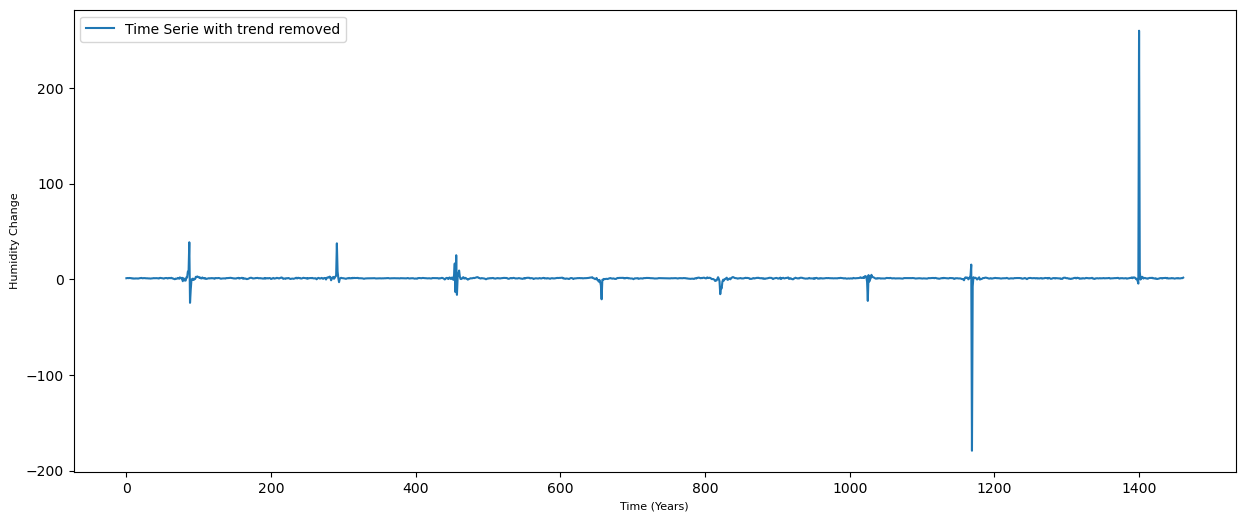

In [212]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def maSmooth(TSeries,omega,data_aug=False):
    M=omega.shape[0]
    lag=int(np.floor((M-1)/2))
    
    if data_aug: #If smooted TS should have the same number of samples
        TSeriesAug=pd.concat([np.flip(TSeries[0:lag]), TSeries, np.flip(TSeries[-lag:])])
    else:
        TSeriesAug=TSeries
        
    nf=range(lag,TSeriesAug.size-lag)
    xf=np.zeros(TSeriesAug.size-2*(lag)).astype('float')
    for n in nf:
        xf[n-lag]=(1/float(sum(omega)))*np.sum(np.multiply(TSeriesAug[n-lag:n+lag+1],omega))
    xf=pd.Series(data=xf, index=TSeriesAug.index[lag:TSeriesAug.size-lag],name="Smoothed TS with M="+str(M))
    
    return xf

HTS=pd.Series(data=np.array(ts_temperature),index=tDays,name="Humidity TS")

M=5
omega=np.ones(M)*(1/float(M))    
smooth5=maSmooth(HTS,omega,data_aug=True)

M=7
omega=np.ones(M)*(1/float(M))
smooth7=maSmooth(HTS,omega,data_aug=True)

M=31
omega=np.ones(M)*(1/float(M))
smooth31=maSmooth(HTS,omega,data_aug=True)

plt.figure(figsize=(15,6))

ax=HTS.plot(color='r',legend=True)
#smooth5.plot(color='b',legend=True)
smooth7.plot(color='b',legend=True)
smooth31.plot(color='k',legend=True)
ax.set_ylabel('Humidity',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})


plt.figure(figsize=(15,6))

psNoTrend=HTS/smooth31
psNoTrend.name="Time Serie with trend removed"
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('Humidity Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})

Text(0.5, 0, 'Time (Years)')

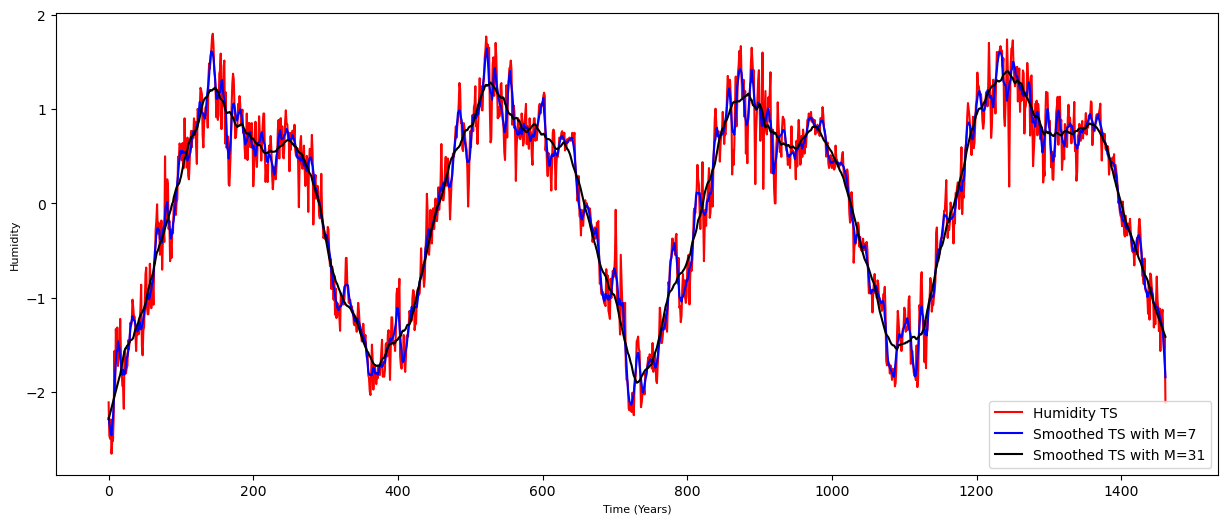

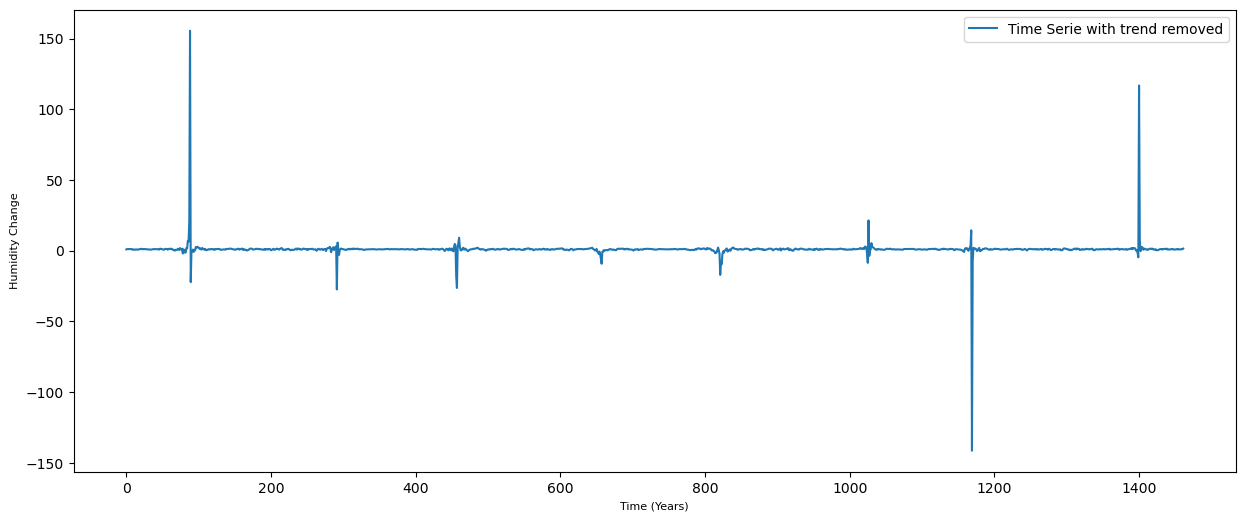

In [213]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def flin(x,a,b):
    return a*x+b

def xWeights(x,xi,span):
    wi=(1-abs((x-xi)/float(span))**3)**3
    #plt.figure()
    #plt.plot(wi)
    return wi

def yWeights(ri,MAD):
    if np.abs(ri)<6*MAD:
        return (1-((ri/(6*MAD))**2))**2
    else:
        return 0


def loessPass(TSeries,TSeriesE=pd.Series(np.array([])),span=5,timePass=True):
    lag=int((span-1)/2)
    xf=np.zeros(TSeries.size).astype('float')
    for k in range(TSeries.size):
        if k<lag:
            win=TSeries[0:span]
            if not timePass:
                winE=TSeriesE[0:span]
            xvs=np.array(range(span))
            #print "No inicio"
        elif k>=TSeries.size-lag:
            #print "No fim"
            win=TSeries[TSeries.size-span:]
            if not timePass:
                winE=TSeriesE[TSeriesE.size-span:]
            xvs=np.array(range(TSeries.size-span,TSeries.size))
        else:
            #print "No meio"
            win=TSeries[k-lag:k+lag+1]
            if not timePass:
                winE=TSeriesE[k-lag:k+lag+1]
            xvs=np.array(range(k-lag,k+lag+1))

        ws=np.zeros(span).astype('float')
            
        if not timePass:
            res=np.array(win-winE)
            #res=res.as_matrix()
            MAD=np.median(np.abs(res))
            
        for xw in range(len(xvs)):
            if timePass:
                ws[xw]=xWeights(k,xvs[xw],np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1]))))
            else:
                ws[xw]=yWeights(res[xw],MAD)
            #print np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1])))
        exog = sm.add_constant(xvs)
        
        mod_wls = sm.WLS(win, exog, weights=ws)
        res_wls = mod_wls.fit()
        
        xf[k]=res_wls.params[1]*k + res_wls.params[0]
    return xf

def lowess(TSeries,span=5,ftype='linear'):
    
    xf=loessPass(TSeries,span=span,timePass=True)
    xf=loessPass(TSeries,TSeriesE=pd.Series(data=xf, index=TSeries.index),span=span,timePass=False)
    xf=pd.Series(data=xf, index=TSeries.index,name="Smoothed TS with M="+str(M))
    return xf


M=5
smooth5=lowess(HTS)

M=7
smooth7=lowess(HTS,span=M)

M=31
smooth31=lowess(HTS,span=M)

plt.figure(figsize=(15,6))

ax=HTS.plot(color='r',legend=True)
smooth7.plot(color='b',legend=True)
smooth31.plot(color='k',legend=True)
ax.set_ylabel('Humidity',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})


plt.figure(figsize=(15,6))

HNoTrend=HTS/smooth31
HNoTrend.name="Time Serie with trend removed"
ax=HNoTrend.plot(legend=True)
ax.set_ylabel('Humidity Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})

#### Seasonality

Text(0, 0.5, 'Normalized Power Spectrum (A.U.)')

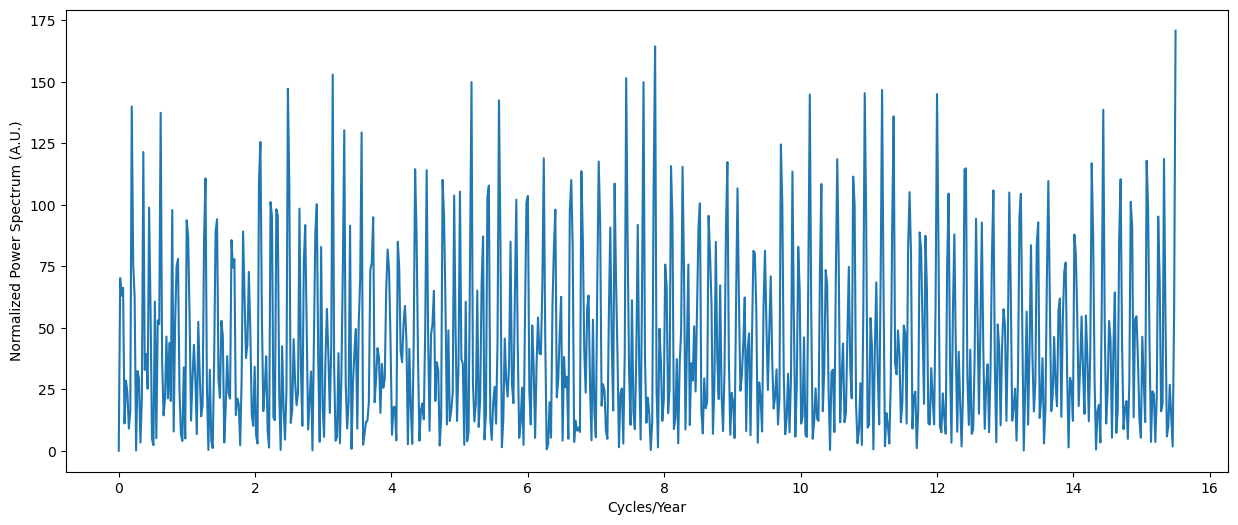

In [214]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



fTS=(np.abs(np.fft.rfft(HNoTrend-HNoTrend.mean()))**2/HNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=31# samples/month
f=np.fft.rfftfreq(HNoTrend.size, d=1/samp_freq)
plt.figure(figsize=(15,6))
plt.plot(f,fTS)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")

##### Seasonality assessment by filtering

Text(0.5, 0, 'Time (Years)')

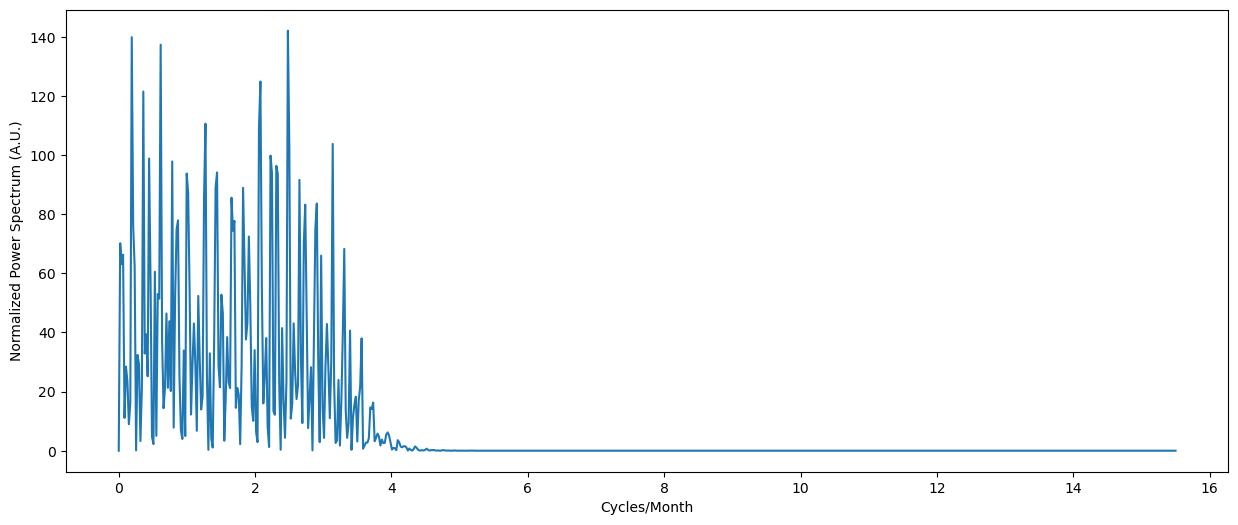

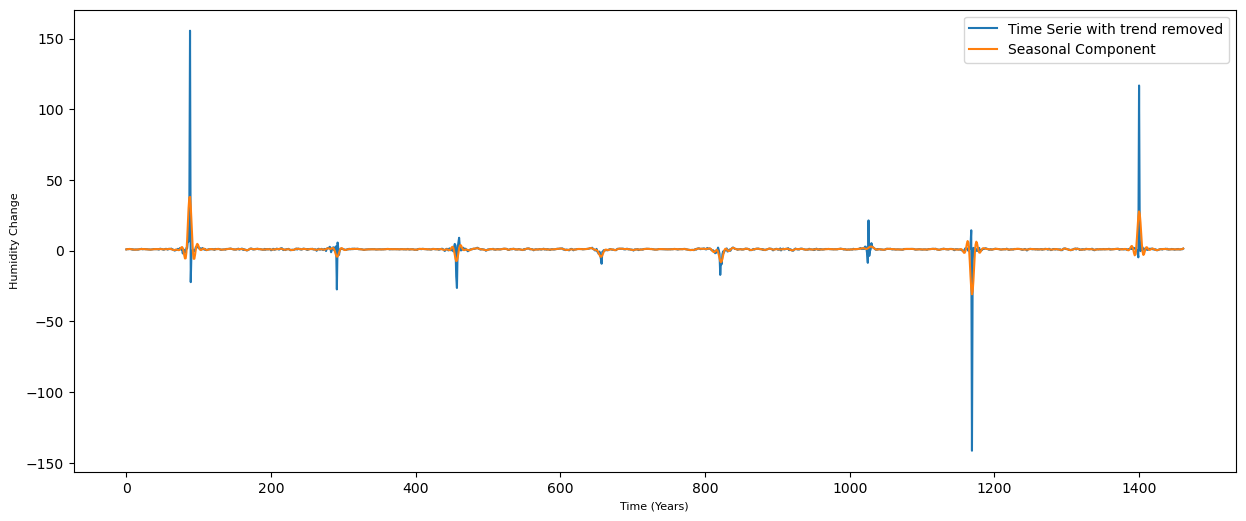

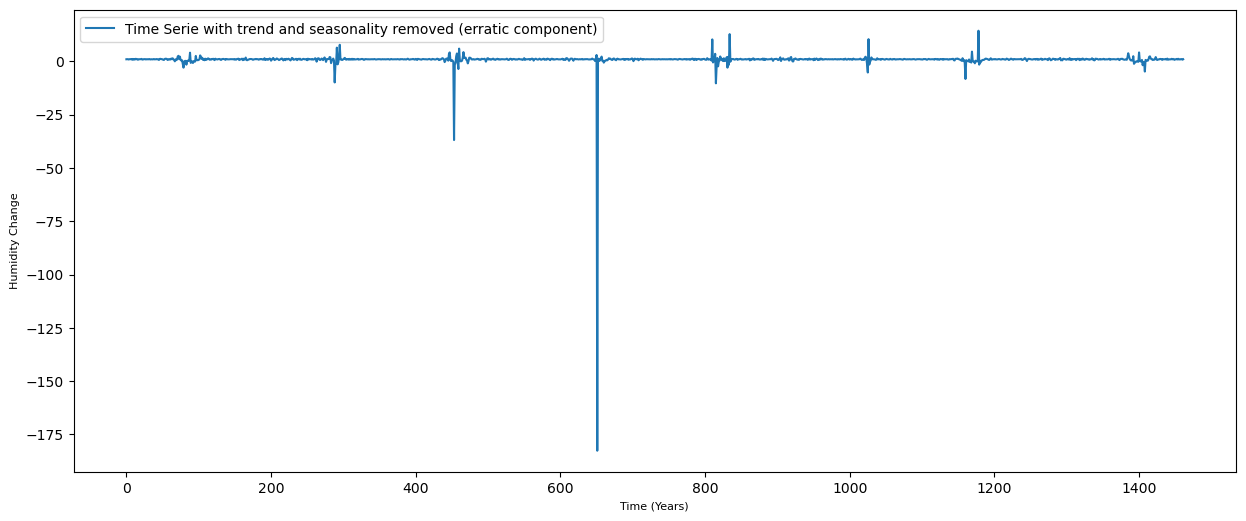

In [215]:
import scipy.signal as scs


sos=scs.butter(N=5,fs=12,Wn=[1.4],btype='lowpass',output='sos')

Seasonal = scs.sosfiltfilt(sos,HNoTrend)


#Lets look at the filter effect
fTS=(np.abs(np.fft.rfft(Seasonal-np.mean(Seasonal)))**2/HNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=31 #12 samples/year
f=np.fft.rfftfreq(HNoTrend.size, d=1/samp_freq)
plt.figure(figsize=(15,6))
plt.plot(f,fTS)
plt.xlabel("Cycles/Month")
plt.ylabel("Normalized Power Spectrum (A.U.)")


#Plot Seasonal component as compared with the TS without trend
SeaTS=pd.Series(data=Seasonal,index=HTS.index,name="Seasonal Component")
plt.figure(figsize=(15,6))
ax=HNoTrend.plot(legend=True)
ax.set_ylabel('Humidity Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
SeaTS.plot(legend=True)

#Remove seasonal component by assuming the multiplicative model
HNoTrendNoSeas=HNoTrend/SeaTS
HNoTrendNoSeas.name="Time Serie with trend and seasonality removed (erratic component)"

plt.figure(figsize=(15,6))
ax=HNoTrendNoSeas.plot(legend=True)
ax.set_ylabel('Humidity Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})




#### Trend and seasonality removal by differencing

Text(0.5, 36.72222222222221, 'Time (Year Num.-Day)')

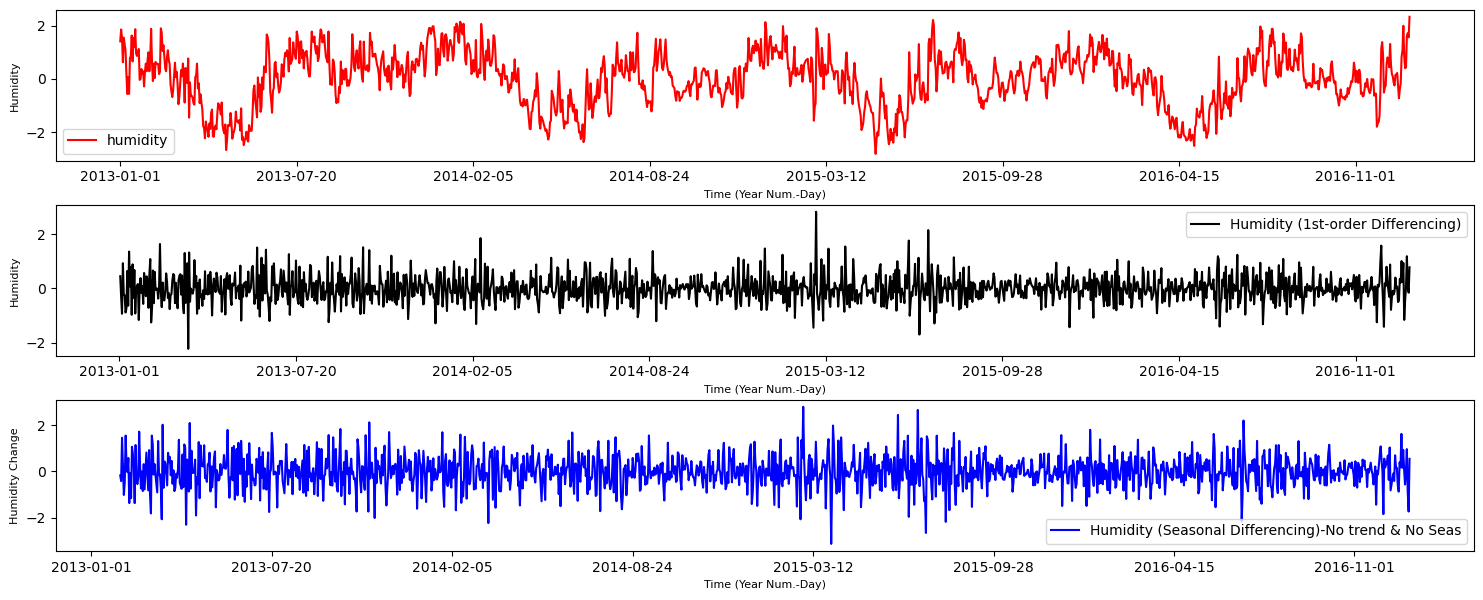

In [216]:
fig, axs=plt.subplots(3, figsize=(15,6))
fig.tight_layout()
ts_humidity.plot(ax=axs[0],legend=True,color='r')
axs[0].set_ylabel('Humidity',fontdict={'fontsize':8})
axs[0].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

d1T_TS=ts_humidity.diff()
d1T_TS.name="Humidity (1st-order Differencing)"
d1T_TS.plot(ax=axs[1],legend=True,color='k')
axs[1].set_ylabel('Humidity',fontdict={'fontsize':8})
axs[1].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

d1psTS=d1T_TS.diff(31)
d1psTS.name="Humidity (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[2],legend=True,color='b')
axs[2].set_ylabel('Humidity Change',fontdict={'fontsize':8})
axs[2].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

#### Autocorrelation & Correlogram

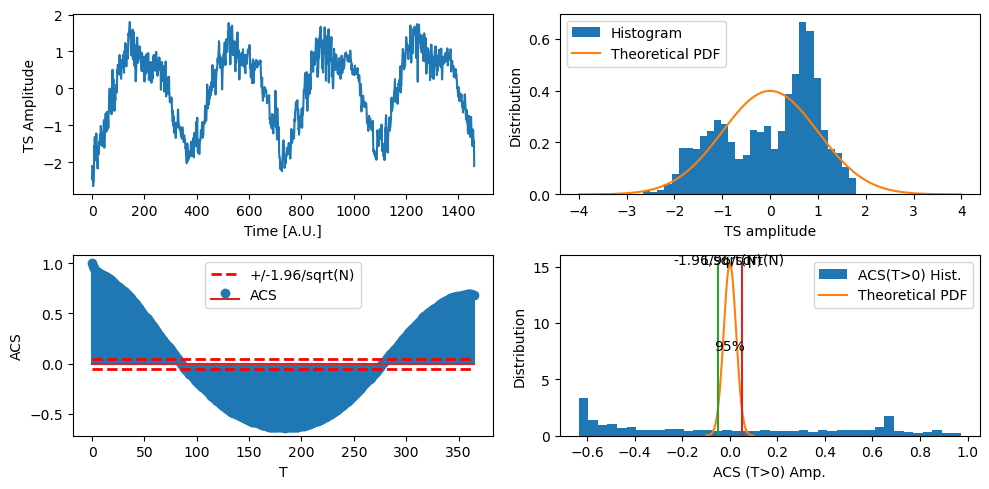

In [217]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spyst


def autocov(timeserie,T=0):
    N=timeserie.size
    mu=timeserie.mean()
    covCoef=0
    for n in range(0,N-T-1):
        covCoef=covCoef+(timeserie[n]-mu)*(timeserie[n+T]-mu)
    return covCoef/float(np.abs(N))
        

def autocoef(timeserie,T=0):
    return autocov(timeserie,T)/autocov(timeserie)

def correlogram(timeserie,maxT,twoside=False):
    N=timeserie.size
    if twoside:
        corrl=np.zeros(2*maxT+1)
        ix=np.array(range(maxT+1))
        ix=np.concatenate((-np.flip(ix[1:]),ix),axis=0)
    else:
        corrl=np.zeros(maxT+1)  
        ix=np.array(range(maxT+1))
    
    for i in range(maxT+1):
        if twoside:
            corrl[i+maxT]=autocoef(timeserie,i);
            if i>0:
                corrl[maxT-i]=corrl[i+maxT]
        else:
            corrl[i]=autocoef(timeserie,i);
    d = {'ACS':corrl, 'upsig':np.ones(maxT+1)*(1.96/np.sqrt(N)),'dnsig':-np.ones(maxT+1)*(1.96/np.sqrt(N))}
    corrl=pd.DataFrame(data=d,index=ix)
    return corrl
#================================================================

N = HTS.size

figs,axs=plt.subplots(2,2, tight_layout=True)
HTS.plot(ax=axs[0,0],figsize=(10,5))
axs[0,0].set_xlabel("Time [A.U.]")
axs[0,0].set_ylabel("TS Amplitude")



axs[0,1].hist(HTS,bins=30,density=True,label='Histogram')
y2 = spyst.norm.pdf(np.arange(-4,4,0.01),0,1)
axs[0,1].plot(np.arange(-4,4,0.01),y2,label='Theoretical PDF')

#axs[1].legend('White noise ACS')
axs[0,1].set_xlabel("TS amplitude")
axs[0,1].set_ylabel("Distribution")
axs[0,1].legend()


corrl=correlogram(HTS,maxT=int(N/4))

corrl.name='White noise ACS'
axs[1,0].stem(corrl.index,corrl['ACS'],label='ACS')
axs[1,0].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2,label='+/-1.96/sqrt(N)')
axs[1,0].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('White noise ACS')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("ACS")
axs[1,0].legend()



axs[1,1].hist(corrl['ACS'][1:],bins=40,density=True,label='ACS(T>0) Hist.')

rg=np.arange(-0.1,0.1,0.001)
pdf = spyst.norm.pdf(rg,0,1/np.sqrt(N))
cdf = spyst.norm.cdf(rg,0,1/np.sqrt(N))

aix005=np.where(cdf>=0.025)
ix005=aix005[0][0]
aix095=np.where(cdf>=0.975)
ix095=aix095[0][0]

axs[1,1].plot(rg,pdf,label='Theoretical PDF')
axs[1,1].plot([rg[ix005],rg[ix005]],[0,np.max(pdf)])
axs[1,1].plot([rg[ix095],rg[ix095]],[0,np.max(pdf)])
axs[1,1].text(rg[ix005],np.max(pdf),"-1.96/sqrt(N)",horizontalalignment="center")
axs[1,1].text(rg[ix095],np.max(pdf),"1.96/sqrt(N)",horizontalalignment="center")
axs[1,1].text(0,np.max(pdf)/2,"95%",horizontalalignment="center")
#axs[1].legend('White noise ACS')
axs[1,1].set_xlabel("ACS (T>0) Amp.")
axs[1,1].set_ylabel("Distribution")
axs[1,1].legend()



Text(0, 0.5, 'Autocorrelation')

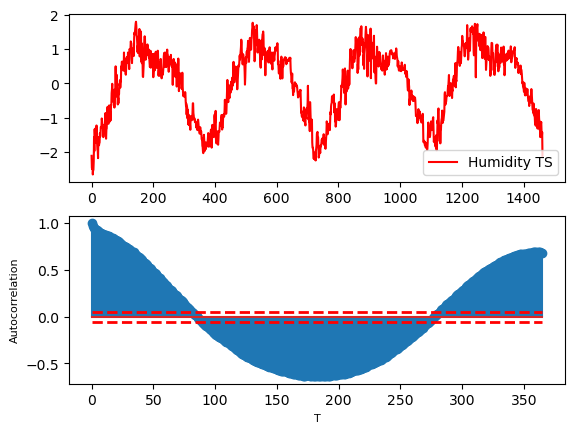

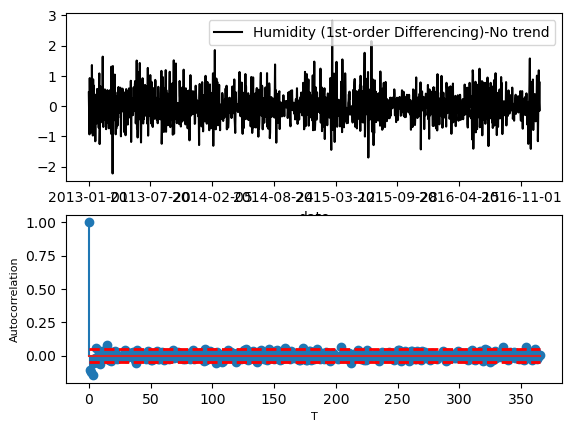

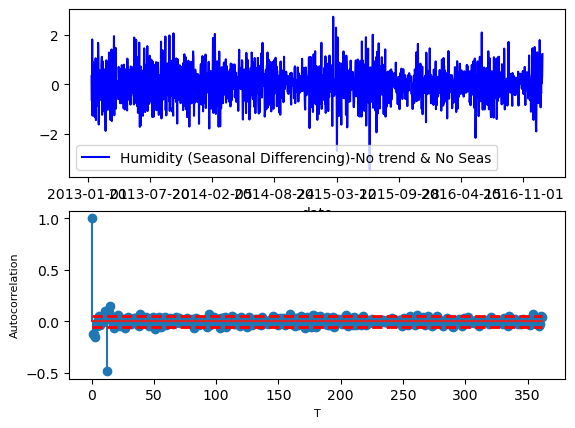

In [218]:
def autocov(timeserie,T=0):
    N=timeserie.size
    mu=timeserie.mean()
    covCoef=0
    for n in range(0,N-T-1):
        covCoef=covCoef+(timeserie[n]-mu)*(timeserie[n+T]-mu)
    return covCoef/float(np.abs(N))
        

def autocoef(timeserie,T=0):
    return autocov(timeserie,T)/autocov(timeserie)

# def correlogram(timeserie,maxT,twoside=False):
#     N=timeserie.size
#     if twoside:
#         corrl=np.zeros(2*maxT+1)
#         ix=np.array(range(maxT+1))
#         ix=np.concatenate((-np.flip(ix[1:]),ix),axis=0)
#     else:
#         corrl=np.zeros(maxT+1)  
#         ix=np.array(range(maxT+1))
    
#     for i in range(maxT+1):
#         if twoside:
#             corrl[i+maxT]=autocoef(timeserie,i);
#             if i>0:
#                 corrl[maxT-i]=corrl[i+maxT]
#         else:
#             corrl[i]=autocoef(timeserie,i);
#     d = {'ACS':corrl, 'upsig':np.ones(maxT+1)*(1.96/np.sqrt(N)),'dnsig':-np.ones(maxT+1)*(1.96/np.sqrt(N))}
#     corrl=pd.DataFrame(data=d,index=ix)
#     return corrl


#Raw
fig, axs=plt.subplots(2)
HTS.plot(ax=axs[0],legend=True,color='r')
plt.ylabel('Humidity',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=HTS.size
corrl=correlogram(HTS,maxT=int(N/4))
corrl.name='Humidity ACS (Raw)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
plt.xlabel("T")
plt.ylabel("Autocorrelation")

#No trend-1st order diff
fig, axs=plt.subplots(2)

d1psTS=ts_humidity.diff()
d1psTS.name="Humidity (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[0],legend=True,color='k')
plt.ylabel('Humidity Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Humidity ACS (No trend)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('Airline Pass. ACS (No trend)')
plt.xlabel("T")
plt.ylabel("Autocorrelation")

#No trend-1st order diff and no seasonality (seas. diff)
fig, axs=plt.subplots(2)

d1psTS=d1psTS.diff(12)
d1psTS.name="Humidity (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[0],legend=True,color='b')
plt.ylabel('Humidity Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Humidity ACS (No trend & No Seas.)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('Airline Pass. ACS (No trend & No Seas.)')
plt.xlabel("T")
plt.ylabel("Autocorrelation")

##### Week

<Axes: xlabel='Samples', ylabel='Var.'>

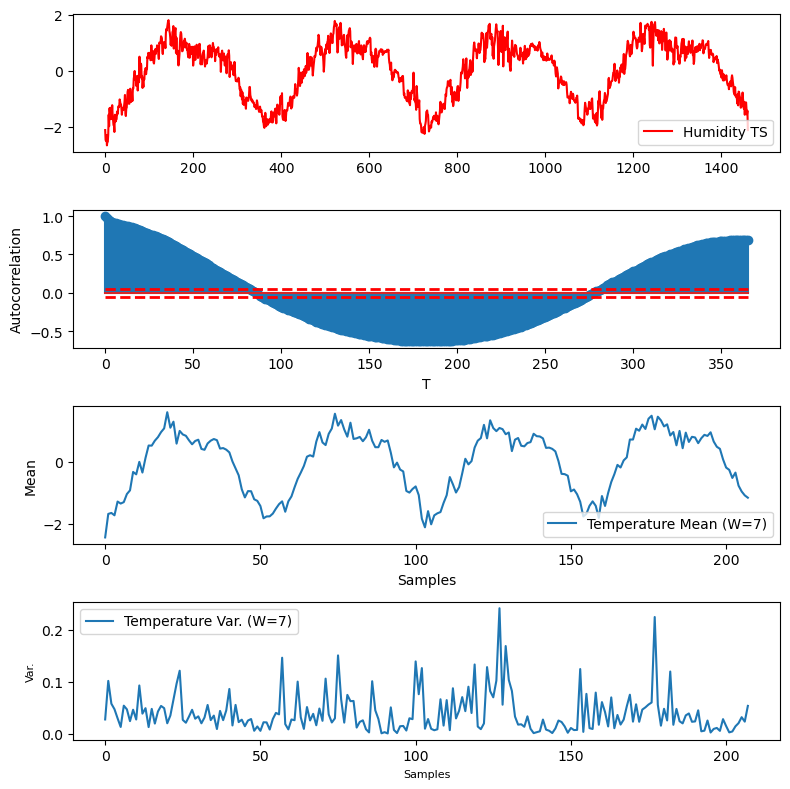

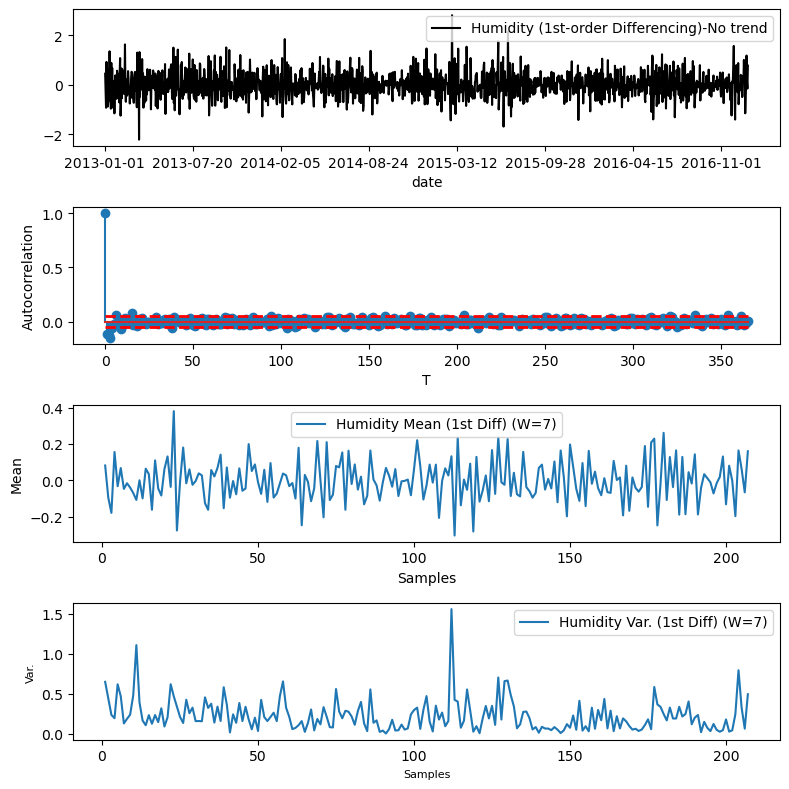

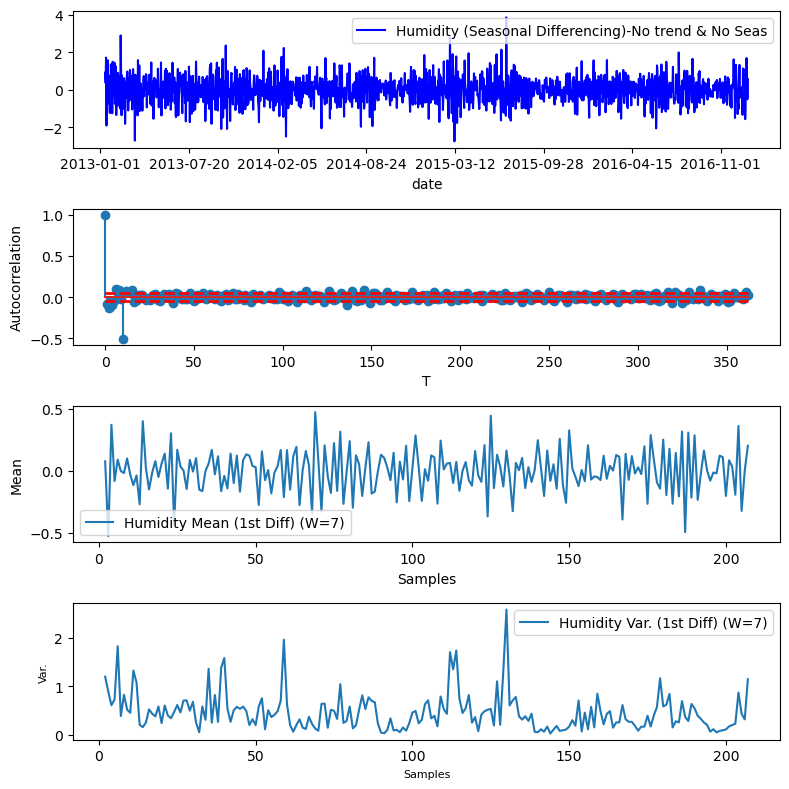

In [219]:
def meanvarWtime(timeseries,W):
    Nwin=int(np.floor(timeseries.size/W))
    vals=timeseries.to_numpy()
    vals=vals[0:int(Nwin*W)]
    mvals=vals.reshape((Nwin,W))
    return {'mu':np.mean(mvals,axis=1),'var':np.var(mvals,axis=1)}


#Raw
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

HTS.plot(ax=axs[0],legend=True,color='r')
plt.ylabel('Humidity',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=HTS.size
corrl=correlogram(HTS,maxT=int(N/4))
corrl.name='Humidity ACS (Raw)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


Win=7 #Compute mean 
meanpsTSSeries=meanvarWtime(HTS,W=Win)['mu']
meanTS=pd.Series(data=meanpsTSSeries,index=np.array(range(meanpsTSSeries.size)),name="Temperature Mean (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

varpsTSSeries=meanvarWtime(HTS,W=Win)['var']
varTS=pd.Series(data=varpsTSSeries,index=np.array(range(varpsTSSeries.size)),name="Temperature Var. (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)






#No trend-1st order diff
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=ts_humidity.diff()
d1psTS.name="Humidity (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[0],legend=True,color='k')
plt.ylabel('Humidity Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Humidity ACS (No trend)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Humidity Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Humidity Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#No trend-1st order diff and no seasonality (seas. diff)
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=d1psTS.diff(10)
d1psTS.name="Humidity (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[0],legend=True,color='b')
plt.ylabel('Humidity Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Humidity ACS (No trend & No Seas.)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Humidity Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Humidity Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

##### Month

<Axes: xlabel='Samples', ylabel='Var.'>

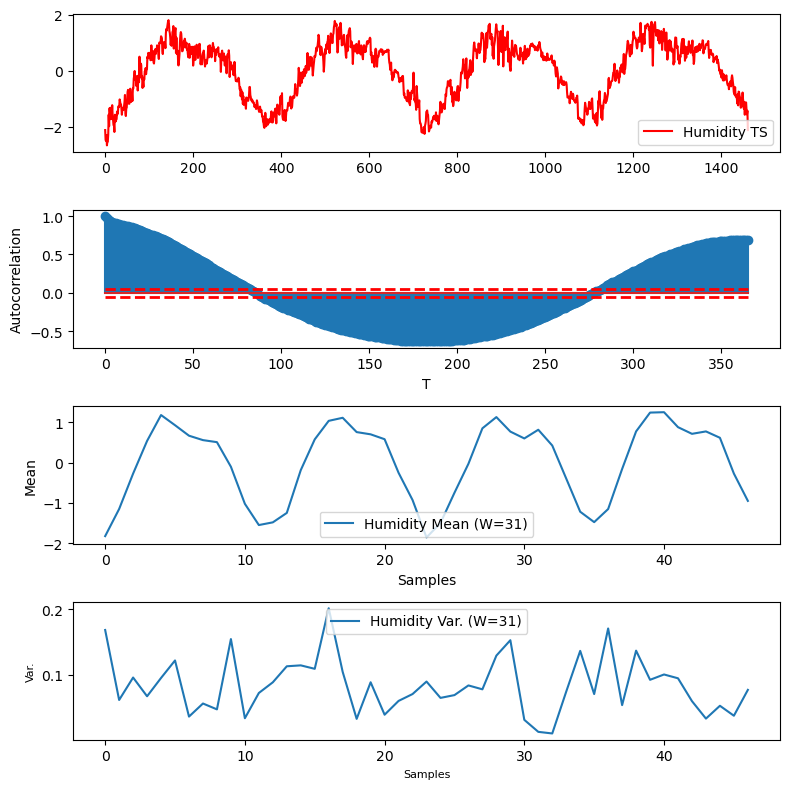

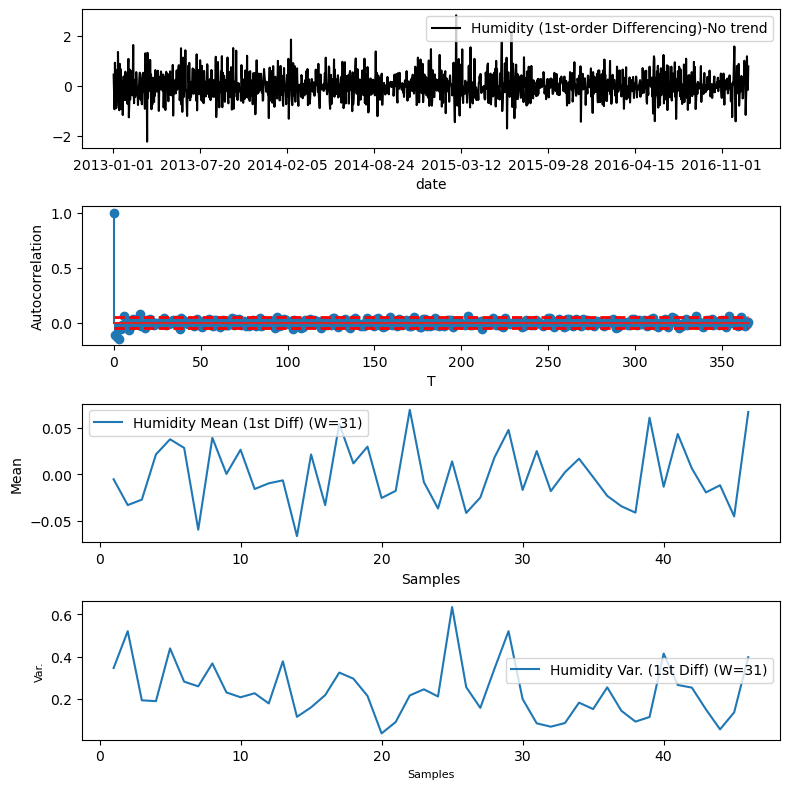

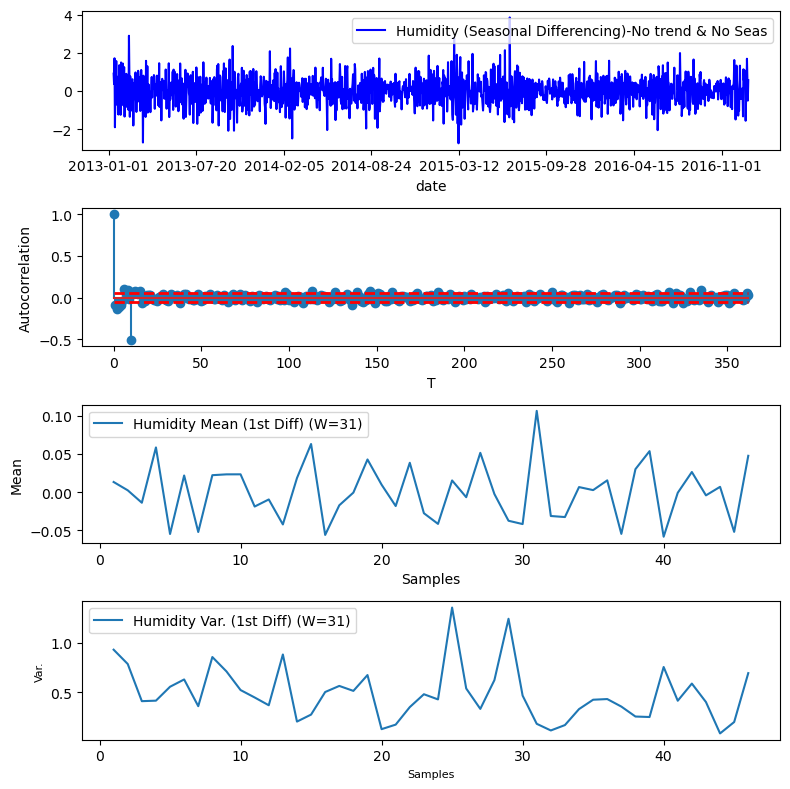

In [220]:
def meanvarWtime(timeseries,W):
    Nwin=int(np.floor(timeseries.size/W))
    vals=timeseries.to_numpy()
    vals=vals[0:int(Nwin*W)]
    mvals=vals.reshape((Nwin,W))
    return {'mu':np.mean(mvals,axis=1),'var':np.var(mvals,axis=1)}


#Raw
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

HTS.plot(ax=axs[0],legend=True,color='r')
plt.ylabel('Humidity',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=HTS.size
corrl=correlogram(HTS,maxT=int(N/4))
corrl.name='Humidity ACS (Raw)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


Win=31 #Compute mean 
meanpsTSSeries=meanvarWtime(HTS,W=Win)['mu']
meanTS=pd.Series(data=meanpsTSSeries,index=np.array(range(meanpsTSSeries.size)),name="Humidity Mean (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

varpsTSSeries=meanvarWtime(HTS,W=Win)['var']
varTS=pd.Series(data=varpsTSSeries,index=np.array(range(varpsTSSeries.size)),name="Humidity Var. (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)






#No trend-1st order diff
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=ts_humidity.diff()
d1psTS.name="Humidity (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[0],legend=True,color='k')
plt.ylabel('Humidity Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Humidity ACS (No trend)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Humidity Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Humidity Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#No trend-1st order diff and no seasonality (seas. diff)
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=d1psTS.diff(10)
d1psTS.name="Humidity (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[0],legend=True,color='b')
plt.ylabel('Humidity Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Humidity ACS (No trend & No Seas.)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Humidity Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Humidity Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#### Statistical approach - The unit root test

In [221]:
print("===============Temperature data (RAW)============")
#Raw
result=st.adfuller(HTS)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
#No trend-1st order diff
print("===============Temperature  data (1st differencing)============")

d1psTS=ts_humidity.diff()

result=st.adfuller(d1psTS.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



#No trend-1st order diff and no seasonality (seas. diff)
print("===============Temperature  data (1st Differencing+Seasonal Differencing)============")

d1psTS=d1psTS.diff(10)

result=st.adfuller(d1psTS.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


===============Temperature data (RAW)============
ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
===============Temperature  data (1st differencing)============
ADF Statistic: -12.683532
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
===============Temperature  data (1st Differencing+Seasonal Differencing)============
ADF Statistic: -13.979989
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


### Wind

In [28]:
ts_wind_speed = df_train[['date', 'wind_speed']]
ts_wind_speed = ts_wind_speed.set_index('date')
ts_wind = ts_wind_speed.squeeze()
print(type(ts_wind))
ts_wind

<class 'pandas.core.series.Series'>


date
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Name: wind_speed, Length: 1462, dtype: float64

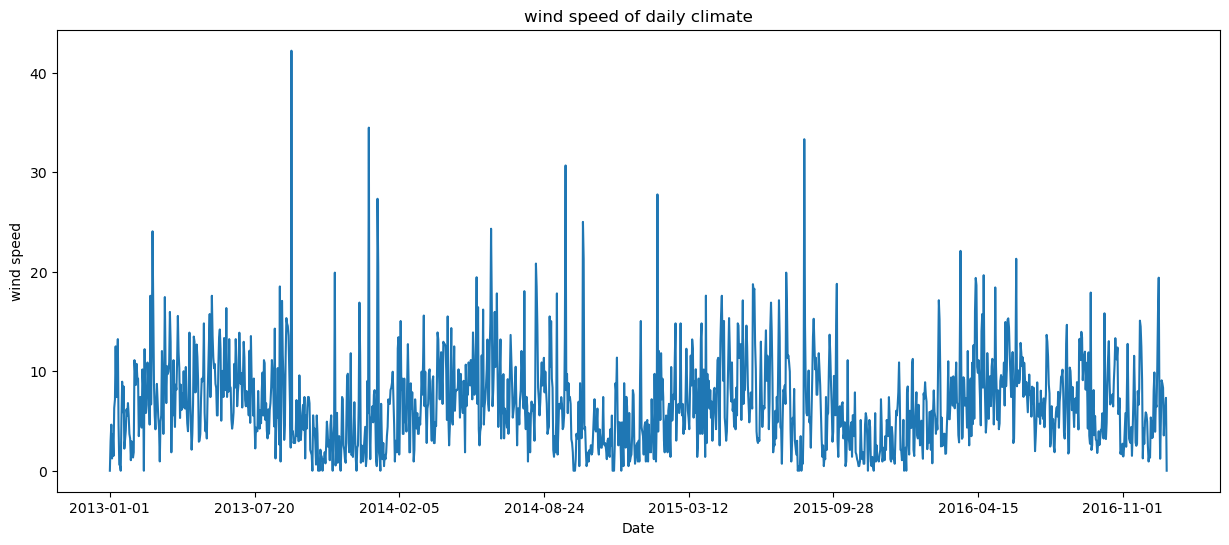

In [29]:
fig, ax = plt.subplots(figsize=(15,6))
ts_wind.plot(xlabel="Date", ylabel="wind speed", title="wind speed of daily climate", ax=ax);

#### Week

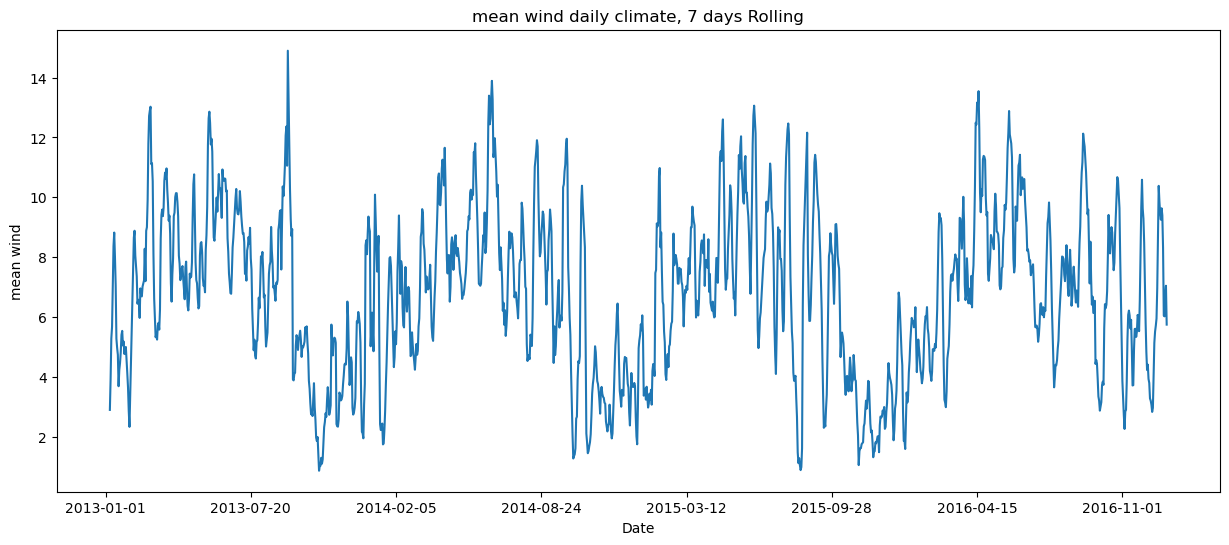

In [61]:
fig, ax = plt.subplots(figsize=(15,6))
ts_wind.rolling(7).mean().plot(xlabel="Date", ylabel="mean wind", title="mean wind daily climate, 7 days Rolling", ax=ax);

#### Month

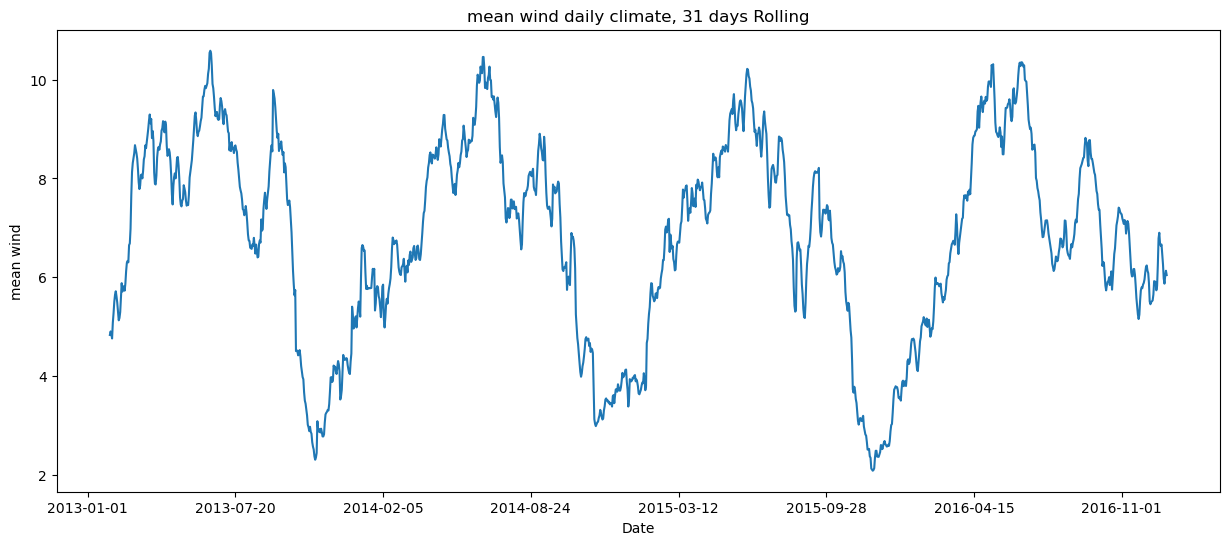

In [62]:
fig, ax = plt.subplots(figsize=(15,6))
ts_wind.rolling(31).mean().plot(xlabel="Date", ylabel="mean wind", title="mean wind daily climate, 31 days Rolling", ax=ax);

#### Autocorrelation

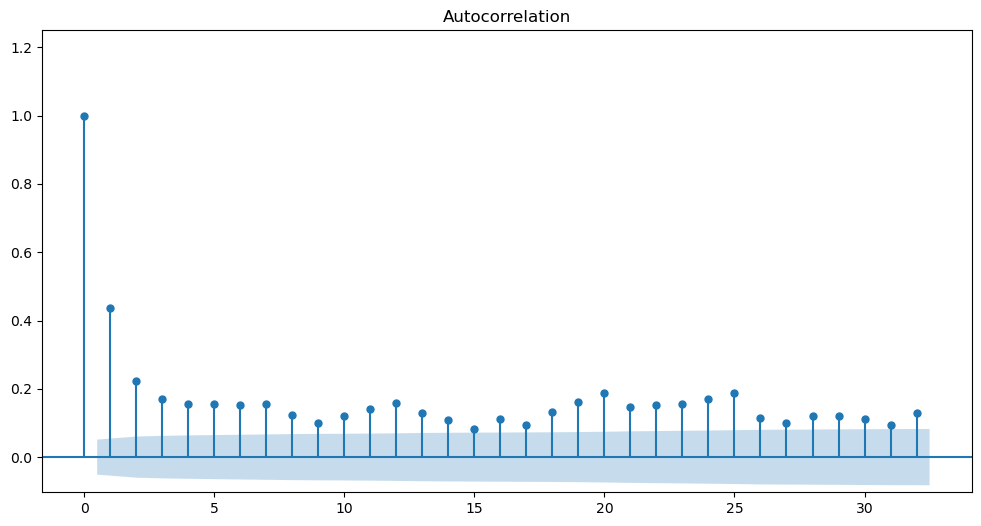

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(12,6))
plot_acf(ts_wind, ax=ax, fft=True, auto_ylims=True);

#### Model-fitting approaches

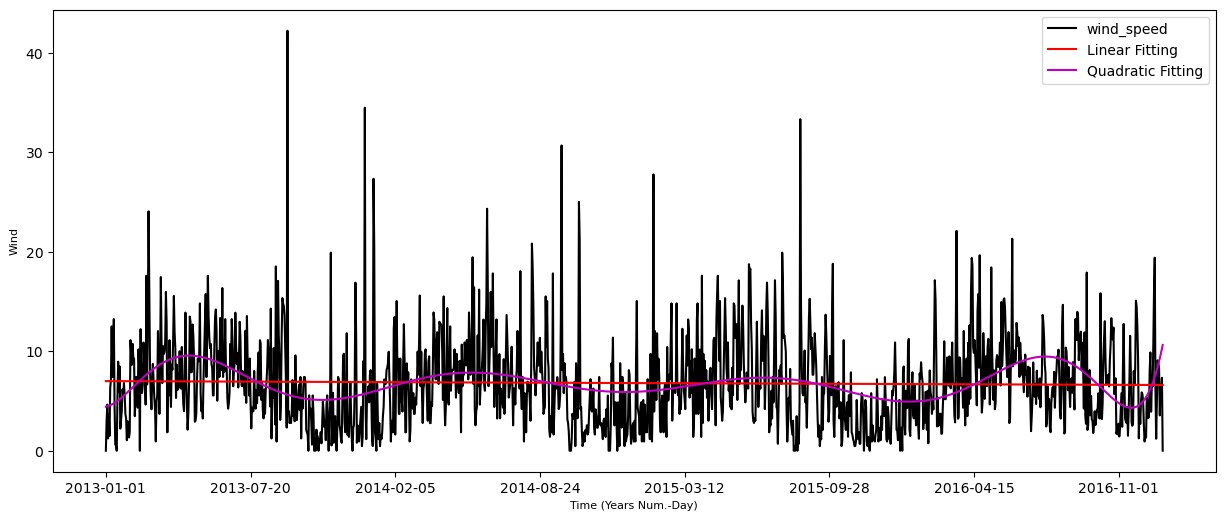

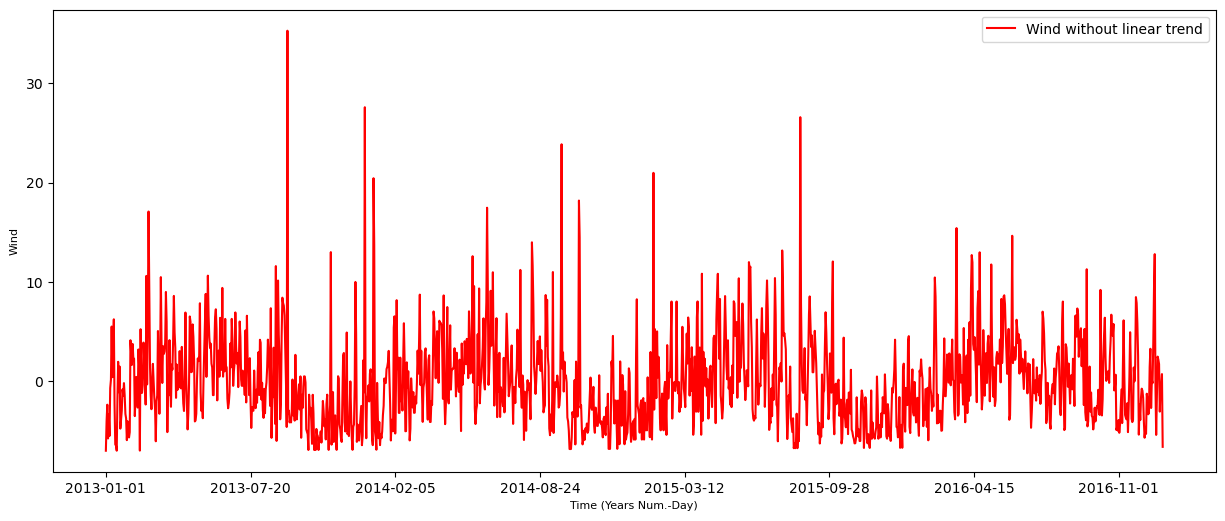

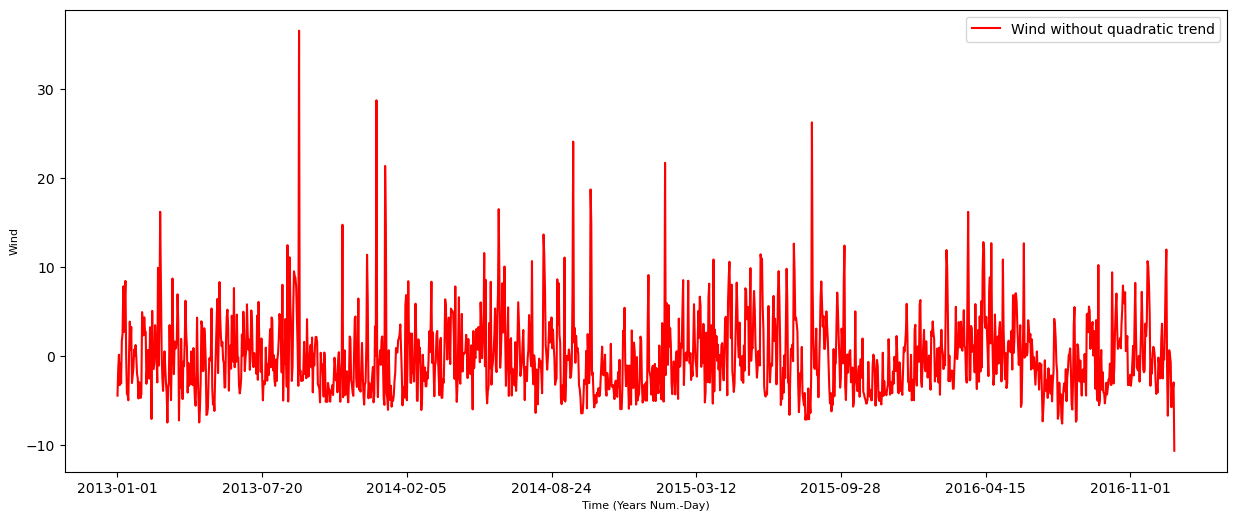

In [65]:
tDays=np.array(range(ts_wind.shape[0]))

#Linear trend estimation by fitting
coefs=np.polyfit(tDays,np.array(ts_wind),1)
linVals=np.polyval(coefs,tDays)
linTS=pd.Series(data=linVals,index=ts_wind.index,name="Linear Fitting")

#Quadratic trend estimation by fitting
coefs=np.polyfit(tDays,np.array(ts_wind),10)
quadVals=np.polyval(coefs,tDays)
quadTS=pd.Series(data=quadVals,index=ts_wind.index,name="Quadratic Fitting")

plt.figure(figsize=(15,6))
ax=ts_wind.plot(legend=True,color='k')
linTS.plot(ax=ax,legend=True,color='r')
quadTS.plot(ax=ax,legend=True,color='m')
ax.set_ylabel('Wind',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})
plt.show()
#Remove linear trend

plt.figure(figsize=(15,6))
HsNoLinTrend=ts_wind-linTS
HsNoLinTrend.name="Wind without linear trend"
ax2=HsNoLinTrend.plot(legend=True,color='r')
ax2.set_ylabel('Wind',fontdict={'fontsize':8})
ax2.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})
plt.show()
#Remove quadraic trend

plt.figure(figsize=(15,6))
HsNoQuadTrend=ts_wind-quadTS
HsNoQuadTrend.name="Wind without quadratic trend"
ax3=HsNoQuadTrend.plot(legend=True,color='r')
ax3.set_ylabel('Wind',fontdict={'fontsize':8})
ax3.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})
plt.show()

#### Local smoothing approaches 

Text(0.5, 0, 'Time (Years)')

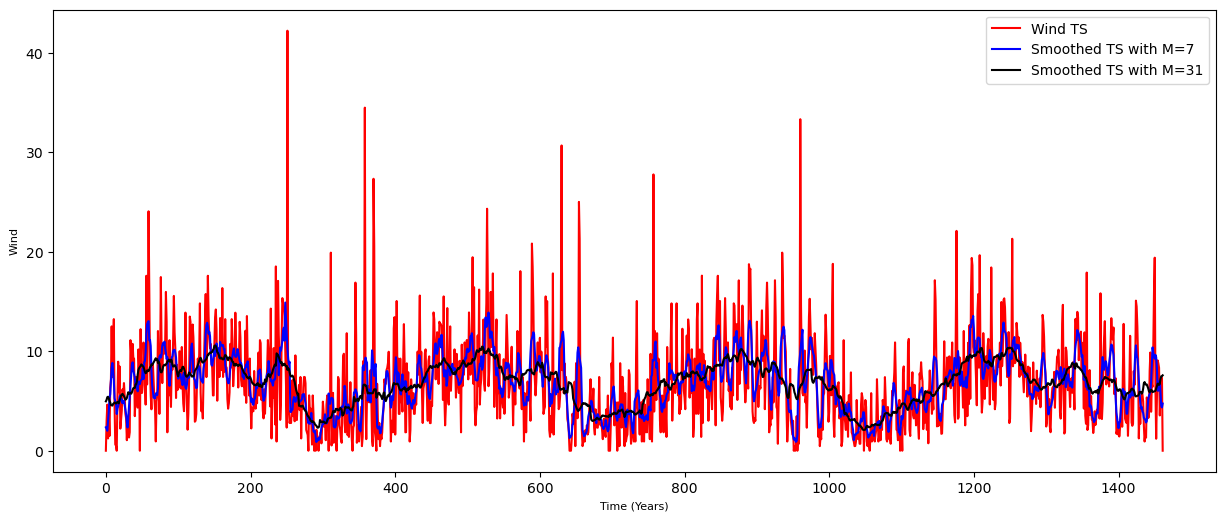

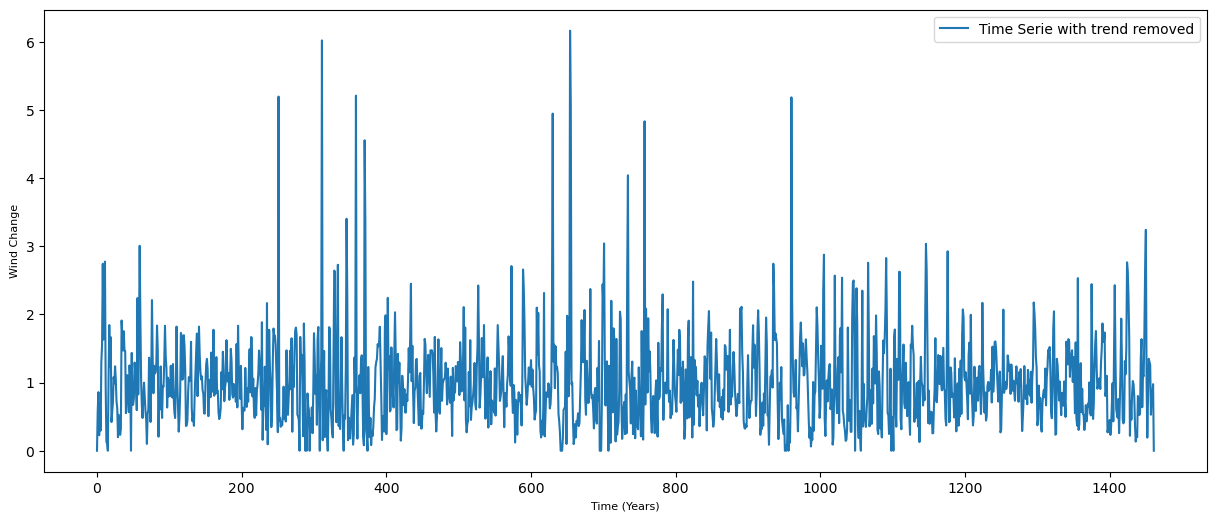

In [67]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def maSmooth(TSeries,omega,data_aug=False):
    M=omega.shape[0]
    lag=int(np.floor((M-1)/2))
    
    if data_aug: #If smooted TS should have the same number of samples
        TSeriesAug=pd.concat([np.flip(TSeries[0:lag]), TSeries, np.flip(TSeries[-lag:])])
    else:
        TSeriesAug=TSeries
        
    nf=range(lag,TSeriesAug.size-lag)
    xf=np.zeros(TSeriesAug.size-2*(lag)).astype('float')
    for n in nf:
        xf[n-lag]=(1/float(sum(omega)))*np.sum(np.multiply(TSeriesAug[n-lag:n+lag+1],omega))
    xf=pd.Series(data=xf, index=TSeriesAug.index[lag:TSeriesAug.size-lag],name="Smoothed TS with M="+str(M))
    
    return xf
WTS=pd.Series(data=np.array(ts_wind),index=tDays,name="Wind TS")

M=5
omega=np.ones(M)*(1/float(M))    
smooth5=maSmooth(WTS,omega,data_aug=True)

M=7
omega=np.ones(M)*(1/float(M))
smooth7=maSmooth(WTS,omega,data_aug=True)

M=31
omega=np.ones(M)*(1/float(M))
smooth31=maSmooth(WTS,omega,data_aug=True)

plt.figure(figsize=(15,6))

ax=WTS.plot(color='r',legend=True)
#smooth5.plot(color='b',legend=True)
smooth7.plot(color='b',legend=True)
smooth31.plot(color='k',legend=True)
ax.set_ylabel('Wind',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})


plt.figure(figsize=(15,6))

psNoTrend=WTS/smooth31
psNoTrend.name="Time Serie with trend removed"
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('Wind Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})

Text(0.5, 0, 'Time (Years)')

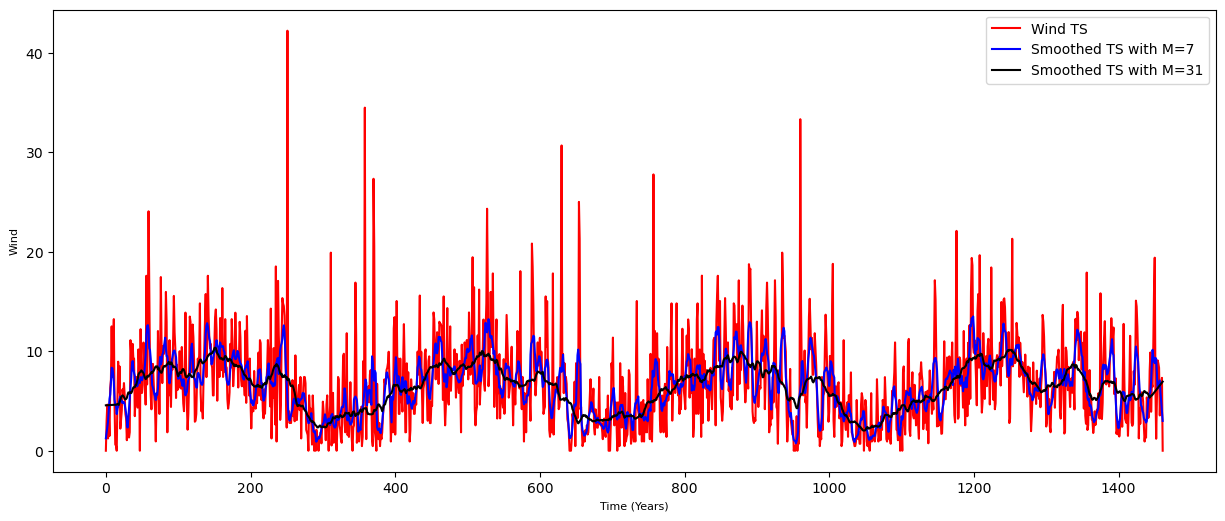

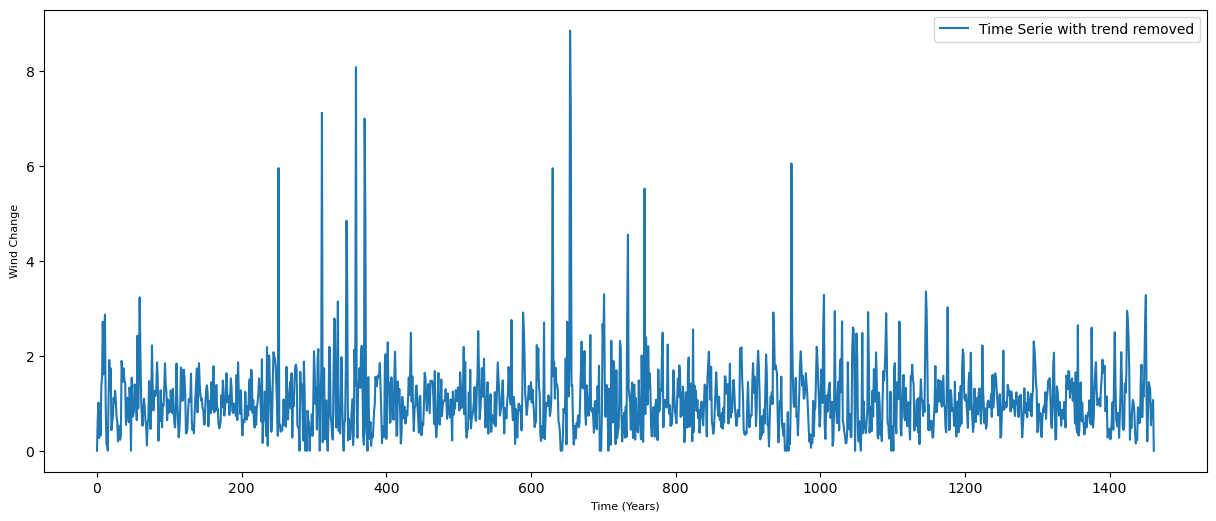

In [68]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def flin(x,a,b):
    return a*x+b

def xWeights(x,xi,span):
    wi=(1-abs((x-xi)/float(span))**3)**3
    #plt.figure()
    #plt.plot(wi)
    return wi

def yWeights(ri,MAD):
    if np.abs(ri)<6*MAD:
        return (1-((ri/(6*MAD))**2))**2
    else:
        return 0


def loessPass(TSeries,TSeriesE=pd.Series(np.array([])),span=5,timePass=True):
    lag=int((span-1)/2)
    xf=np.zeros(TSeries.size).astype('float')
    for k in range(TSeries.size):
        if k<lag:
            win=TSeries[0:span]
            if not timePass:
                winE=TSeriesE[0:span]
            xvs=np.array(range(span))
            #print "No inicio"
        elif k>=TSeries.size-lag:
            #print "No fim"
            win=TSeries[TSeries.size-span:]
            if not timePass:
                winE=TSeriesE[TSeriesE.size-span:]
            xvs=np.array(range(TSeries.size-span,TSeries.size))
        else:
            #print "No meio"
            win=TSeries[k-lag:k+lag+1]
            if not timePass:
                winE=TSeriesE[k-lag:k+lag+1]
            xvs=np.array(range(k-lag,k+lag+1))

        ws=np.zeros(span).astype('float')
            
        if not timePass:
            res=np.array(win-winE)
            #res=res.as_matrix()
            MAD=np.median(np.abs(res))
            
        for xw in range(len(xvs)):
            if timePass:
                ws[xw]=xWeights(k,xvs[xw],np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1]))))
            else:
                ws[xw]=yWeights(res[xw],MAD)
            #print np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1])))
        exog = sm.add_constant(xvs)
        
        mod_wls = sm.WLS(win, exog, weights=ws)
        res_wls = mod_wls.fit()
        
        xf[k]=res_wls.params[1]*k + res_wls.params[0]
    return xf

def lowess(TSeries,span=5,ftype='linear'):
    
    xf=loessPass(TSeries,span=span,timePass=True)
    xf=loessPass(TSeries,TSeriesE=pd.Series(data=xf, index=TSeries.index),span=span,timePass=False)
    xf=pd.Series(data=xf, index=TSeries.index,name="Smoothed TS with M="+str(M))
    return xf


M=5
smooth5=lowess(WTS)

M=7
smooth7=lowess(WTS,span=M)

M=31
smooth31=lowess(WTS,span=M)

plt.figure(figsize=(15,6))

ax=WTS.plot(color='r',legend=True)
smooth7.plot(color='b',legend=True)
smooth31.plot(color='k',legend=True)
ax.set_ylabel('Wind',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})


plt.figure(figsize=(15,6))

WNoTrend=WTS/smooth31
WNoTrend.name="Time Serie with trend removed"
ax=WNoTrend.plot(legend=True)
ax.set_ylabel('Wind Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})

#### Seasonality

Text(0, 0.5, 'Normalized Power Spectrum (A.U.)')

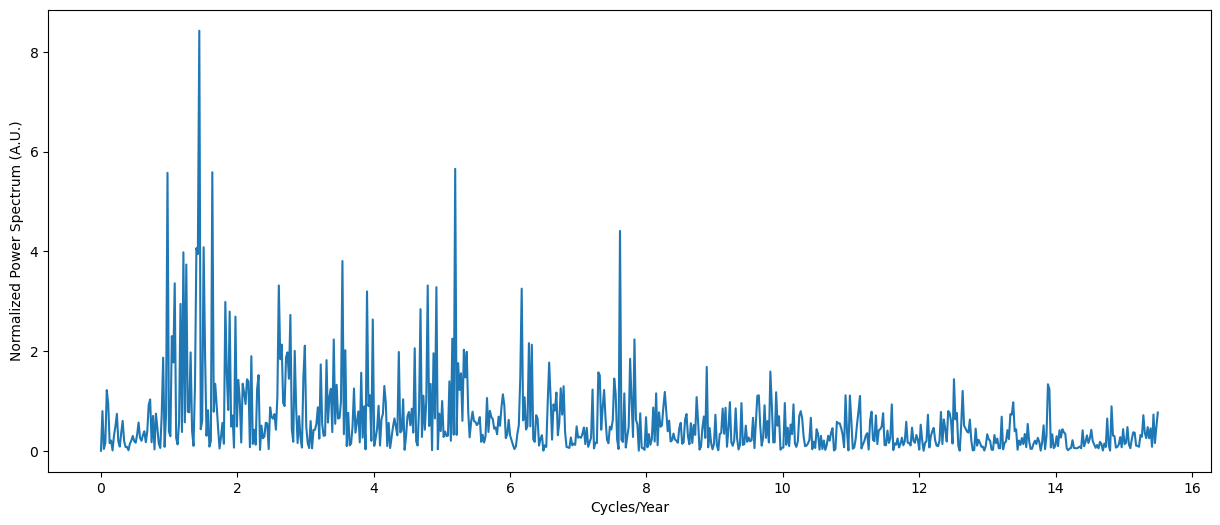

In [73]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



fTS=(np.abs(np.fft.rfft(WNoTrend-WNoTrend.mean()))**2/WNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=31# samples/month
f=np.fft.rfftfreq(WNoTrend.size, d=1/samp_freq)
plt.figure(figsize=(15,6))
plt.plot(f,fTS)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")

##### Seasonality assessment by filtering

Text(0.5, 0, 'Time (Years)')

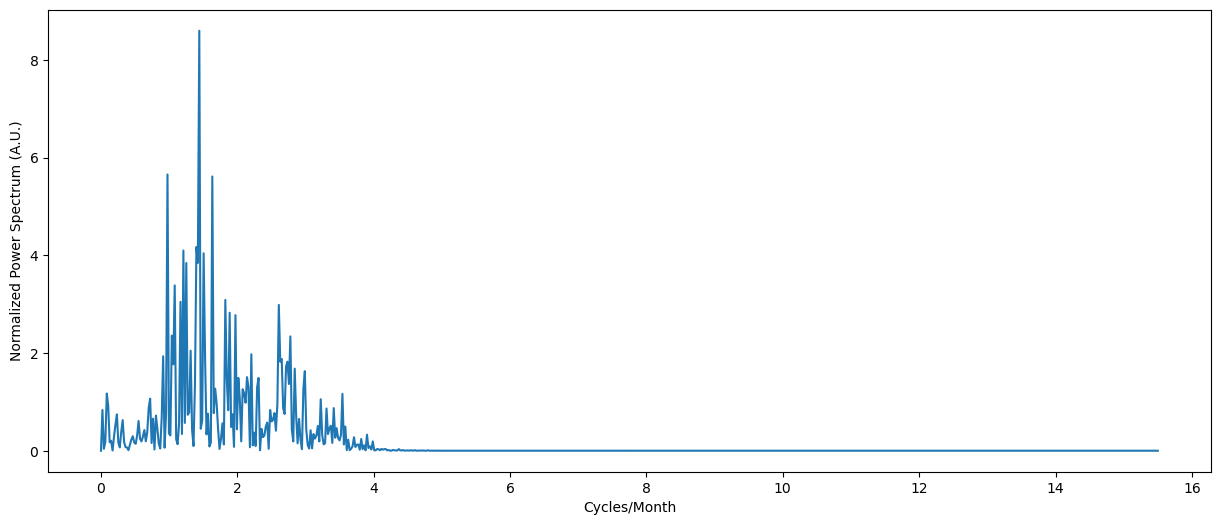

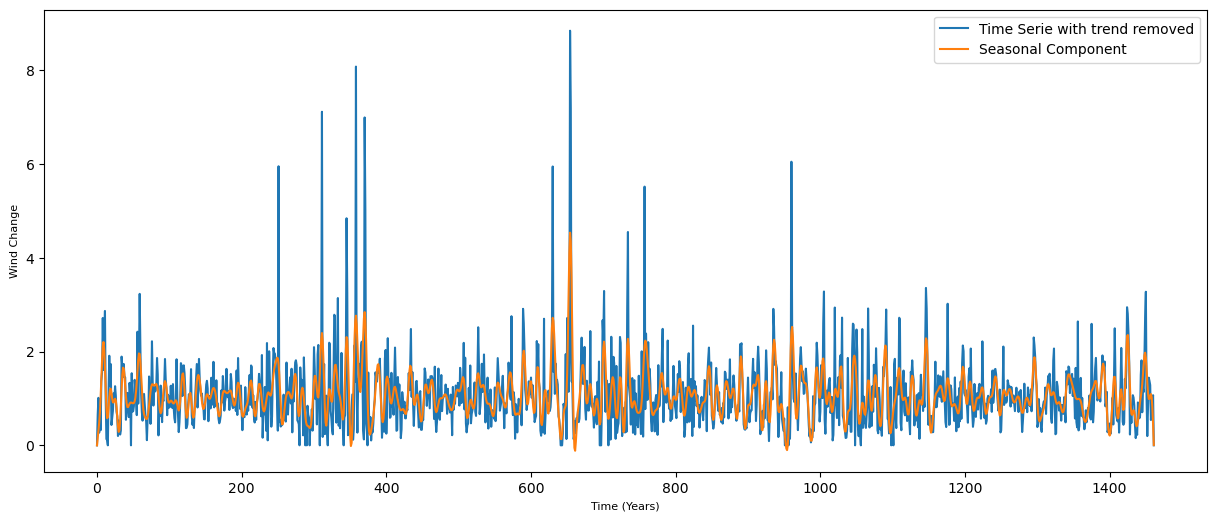

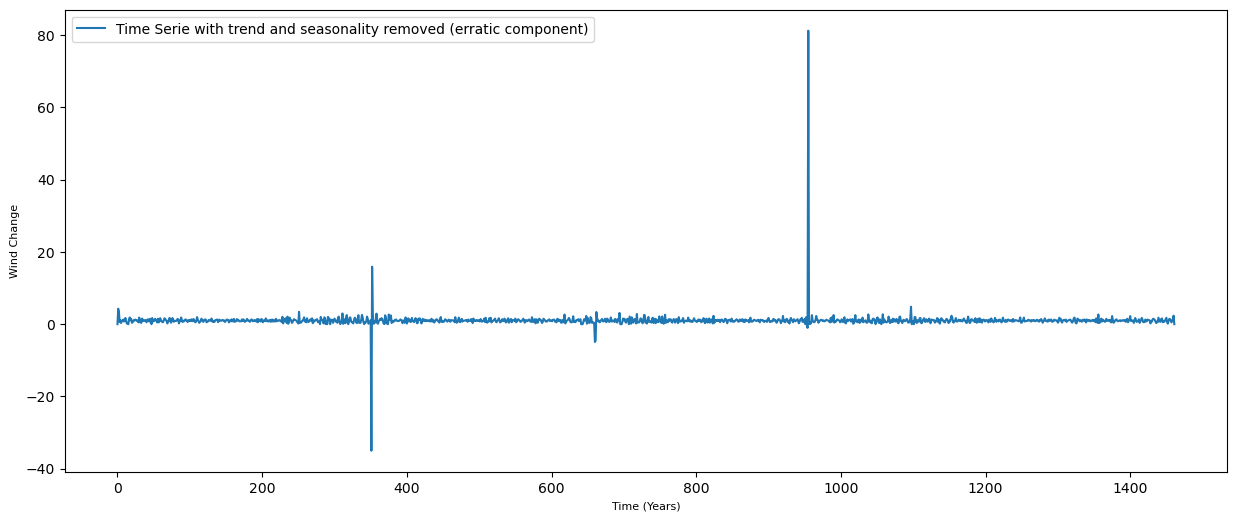

In [74]:
import scipy.signal as scs


sos=scs.butter(N=5,fs=12,Wn=[1.4],btype='lowpass',output='sos')

Seasonal = scs.sosfiltfilt(sos,WNoTrend)


#Lets look at the filter effect
fTS=(np.abs(np.fft.rfft(Seasonal-np.mean(Seasonal)))**2/WNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=31 #12 samples/year
f=np.fft.rfftfreq(WNoTrend.size, d=1/samp_freq)
plt.figure(figsize=(15,6))
plt.plot(f,fTS)
plt.xlabel("Cycles/Month")
plt.ylabel("Normalized Power Spectrum (A.U.)")


#Plot Seasonal component as compared with the TS without trend
SeaTS=pd.Series(data=Seasonal,index=WTS.index,name="Seasonal Component")
plt.figure(figsize=(15,6))
ax=WNoTrend.plot(legend=True)
ax.set_ylabel('Wind Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
SeaTS.plot(legend=True)

#Remove seasonal component by assuming the multiplicative model
WNoTrendNoSeas=WNoTrend/SeaTS
WNoTrendNoSeas.name="Time Serie with trend and seasonality removed (erratic component)"

plt.figure(figsize=(15,6))
ax=WNoTrendNoSeas.plot(legend=True)
ax.set_ylabel('Wind Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})




#### Trend and seasonality removal by differencing

Text(0.5, 36.72222222222221, 'Time (Year Num.-Day)')

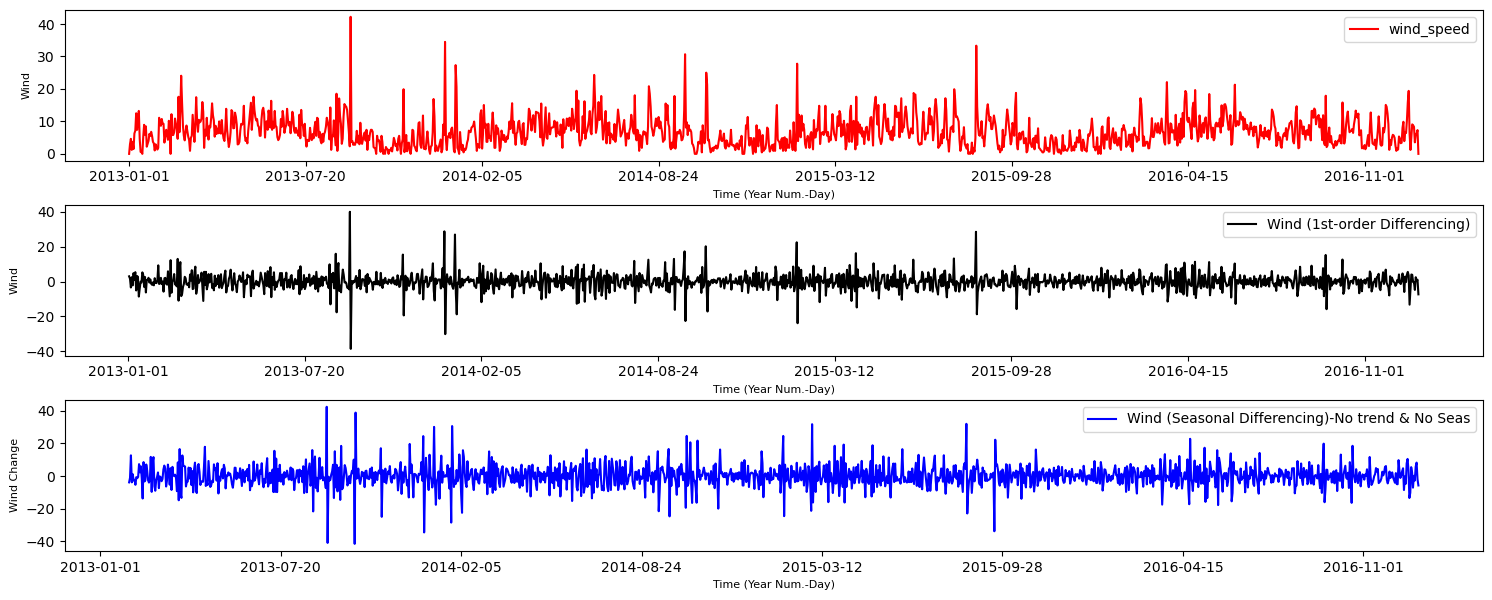

In [77]:
fig, axs=plt.subplots(3, figsize=(15,6))
fig.tight_layout()
ts_wind.plot(ax=axs[0],legend=True,color='r')
axs[0].set_ylabel('Wind',fontdict={'fontsize':8})
axs[0].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

d1T_TS=ts_wind.diff()
d1T_TS.name="Wind (1st-order Differencing)"
d1T_TS.plot(ax=axs[1],legend=True,color='k')
axs[1].set_ylabel('Wind',fontdict={'fontsize':8})
axs[1].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

d1psTS=d1T_TS.diff(31)
d1psTS.name="Wind (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[2],legend=True,color='b')
axs[2].set_ylabel('Wind Change',fontdict={'fontsize':8})
axs[2].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

#### Autocorrelation & Correlogram

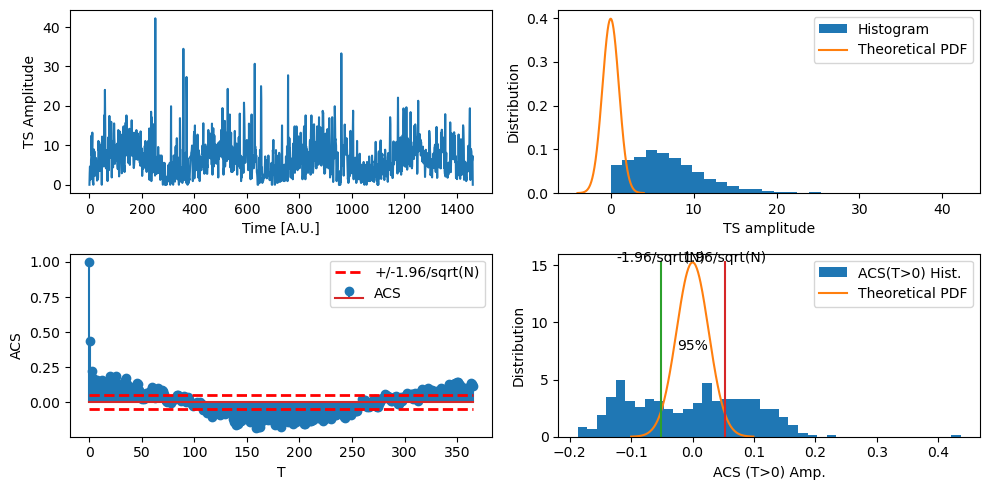

In [78]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spyst


def autocov(timeserie,T=0):
    N=timeserie.size
    mu=timeserie.mean()
    covCoef=0
    for n in range(0,N-T-1):
        covCoef=covCoef+(timeserie[n]-mu)*(timeserie[n+T]-mu)
    return covCoef/float(np.abs(N))
        

def autocoef(timeserie,T=0):
    return autocov(timeserie,T)/autocov(timeserie)

def correlogram(timeserie,maxT,twoside=False):
    N=timeserie.size
    if twoside:
        corrl=np.zeros(2*maxT+1)
        ix=np.array(range(maxT+1))
        ix=np.concatenate((-np.flip(ix[1:]),ix),axis=0)
    else:
        corrl=np.zeros(maxT+1)  
        ix=np.array(range(maxT+1))
    
    for i in range(maxT+1):
        if twoside:
            corrl[i+maxT]=autocoef(timeserie,i);
            if i>0:
                corrl[maxT-i]=corrl[i+maxT]
        else:
            corrl[i]=autocoef(timeserie,i);
    d = {'ACS':corrl, 'upsig':np.ones(maxT+1)*(1.96/np.sqrt(N)),'dnsig':-np.ones(maxT+1)*(1.96/np.sqrt(N))}
    corrl=pd.DataFrame(data=d,index=ix)
    return corrl
#================================================================

N = WTS.size

figs,axs=plt.subplots(2,2, tight_layout=True)
WTS.plot(ax=axs[0,0],figsize=(10,5))
axs[0,0].set_xlabel("Time [A.U.]")
axs[0,0].set_ylabel("TS Amplitude")



axs[0,1].hist(WTS,bins=30,density=True,label='Histogram')
y2 = spyst.norm.pdf(np.arange(-4,4,0.01),0,1)
axs[0,1].plot(np.arange(-4,4,0.01),y2,label='Theoretical PDF')

#axs[1].legend('White noise ACS')
axs[0,1].set_xlabel("TS amplitude")
axs[0,1].set_ylabel("Distribution")
axs[0,1].legend()


corrl=correlogram(WTS,maxT=int(N/4))

corrl.name='White noise ACS'
axs[1,0].stem(corrl.index,corrl['ACS'],label='ACS')
axs[1,0].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2,label='+/-1.96/sqrt(N)')
axs[1,0].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('White noise ACS')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("ACS")
axs[1,0].legend()



axs[1,1].hist(corrl['ACS'][1:],bins=40,density=True,label='ACS(T>0) Hist.')

rg=np.arange(-0.1,0.1,0.001)
pdf = spyst.norm.pdf(rg,0,1/np.sqrt(N))
cdf = spyst.norm.cdf(rg,0,1/np.sqrt(N))

aix005=np.where(cdf>=0.025)
ix005=aix005[0][0]
aix095=np.where(cdf>=0.975)
ix095=aix095[0][0]

axs[1,1].plot(rg,pdf,label='Theoretical PDF')
axs[1,1].plot([rg[ix005],rg[ix005]],[0,np.max(pdf)])
axs[1,1].plot([rg[ix095],rg[ix095]],[0,np.max(pdf)])
axs[1,1].text(rg[ix005],np.max(pdf),"-1.96/sqrt(N)",horizontalalignment="center")
axs[1,1].text(rg[ix095],np.max(pdf),"1.96/sqrt(N)",horizontalalignment="center")
axs[1,1].text(0,np.max(pdf)/2,"95%",horizontalalignment="center")
#axs[1].legend('White noise ACS')
axs[1,1].set_xlabel("ACS (T>0) Amp.")
axs[1,1].set_ylabel("Distribution")
axs[1,1].legend()



Text(0, 0.5, 'Autocorrelation')

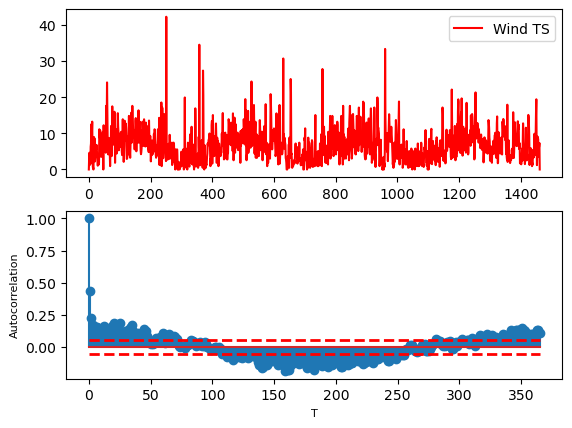

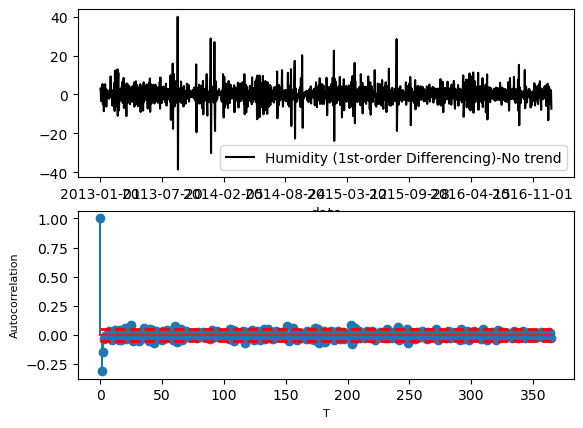

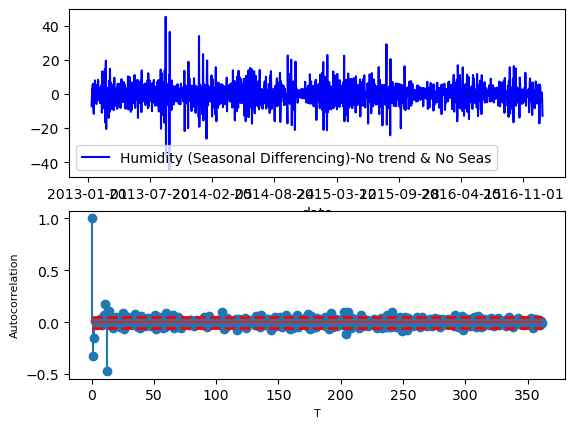

In [80]:
def autocov(timeserie,T=0):
    N=timeserie.size
    mu=timeserie.mean()
    covCoef=0
    for n in range(0,N-T-1):
        covCoef=covCoef+(timeserie[n]-mu)*(timeserie[n+T]-mu)
    return covCoef/float(np.abs(N))
        

def autocoef(timeserie,T=0):
    return autocov(timeserie,T)/autocov(timeserie)

# def correlogram(timeserie,maxT,twoside=False):
#     N=timeserie.size
#     if twoside:
#         corrl=np.zeros(2*maxT+1)
#         ix=np.array(range(maxT+1))
#         ix=np.concatenate((-np.flip(ix[1:]),ix),axis=0)
#     else:
#         corrl=np.zeros(maxT+1)  
#         ix=np.array(range(maxT+1))
    
#     for i in range(maxT+1):
#         if twoside:
#             corrl[i+maxT]=autocoef(timeserie,i);
#             if i>0:
#                 corrl[maxT-i]=corrl[i+maxT]
#         else:
#             corrl[i]=autocoef(timeserie,i);
#     d = {'ACS':corrl, 'upsig':np.ones(maxT+1)*(1.96/np.sqrt(N)),'dnsig':-np.ones(maxT+1)*(1.96/np.sqrt(N))}
#     corrl=pd.DataFrame(data=d,index=ix)
#     return corrl


#Raw
fig, axs=plt.subplots(2)
WTS.plot(ax=axs[0],legend=True,color='r')
plt.ylabel('Wind',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=WTS.size
corrl=correlogram(WTS,maxT=int(N/4))
corrl.name='Wind ACS (Raw)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
plt.xlabel("T")
plt.ylabel("Autocorrelation")

#No trend-1st order diff
fig, axs=plt.subplots(2)

d1psTS=ts_wind.diff()
d1psTS.name="Wind (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[0],legend=True,color='k')
plt.ylabel('Wind Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Wind ACS (No trend)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('Airline Pass. ACS (No trend)')
plt.xlabel("T")
plt.ylabel("Autocorrelation")

#No trend-1st order diff and no seasonality (seas. diff)
fig, axs=plt.subplots(2)

d1psTS=d1psTS.diff(12)
d1psTS.name="Wind (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[0],legend=True,color='b')
plt.ylabel('Wind Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Wind ACS (No trend & No Seas.)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
#axs[1].legend('Airline Pass. ACS (No trend & No Seas.)')
plt.xlabel("T")
plt.ylabel("Autocorrelation")

##### Week

<Axes: xlabel='Samples', ylabel='Var.'>

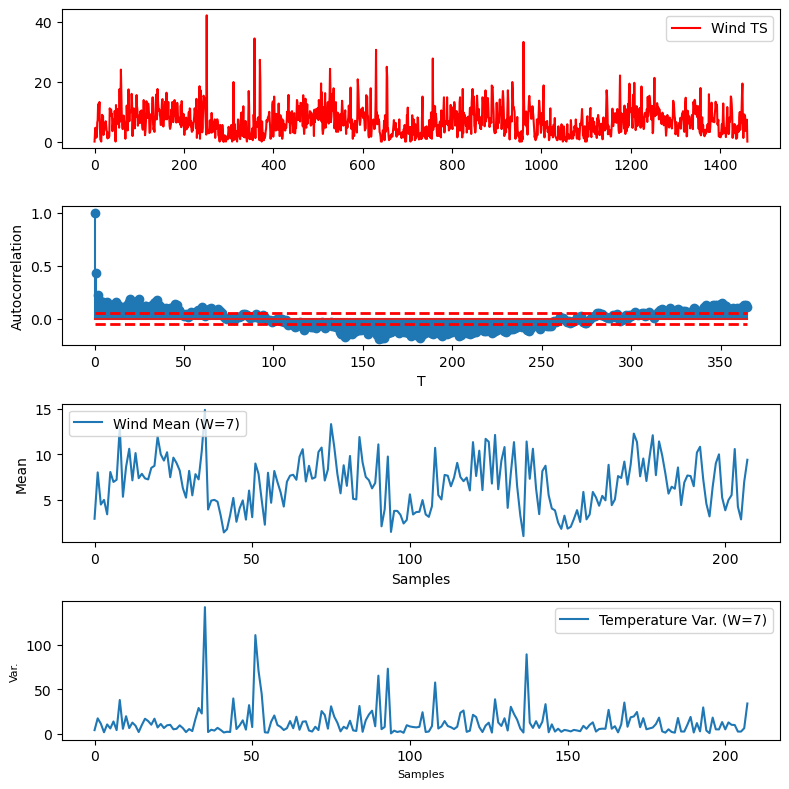

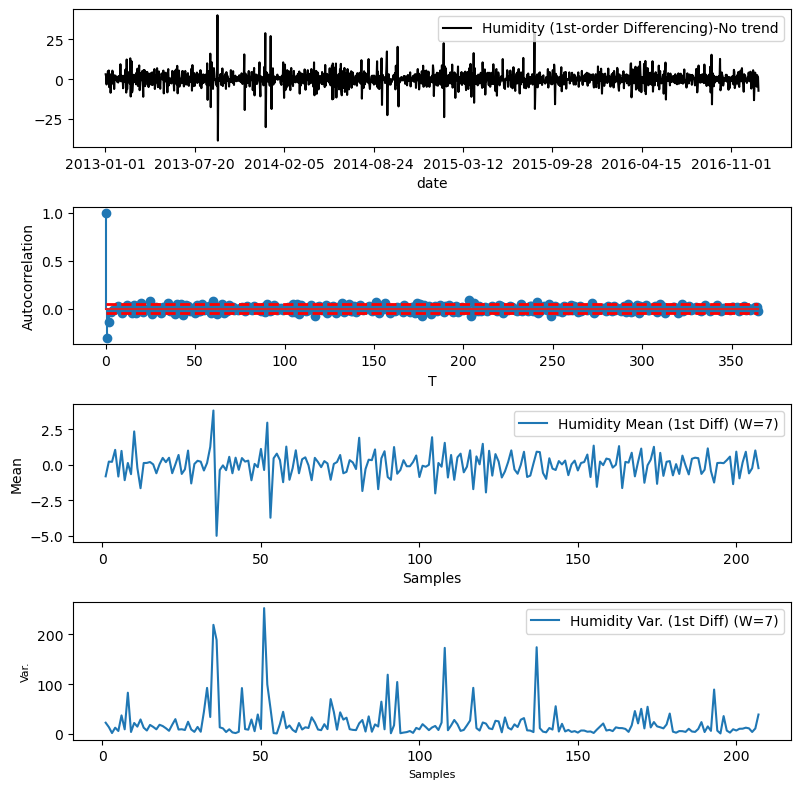

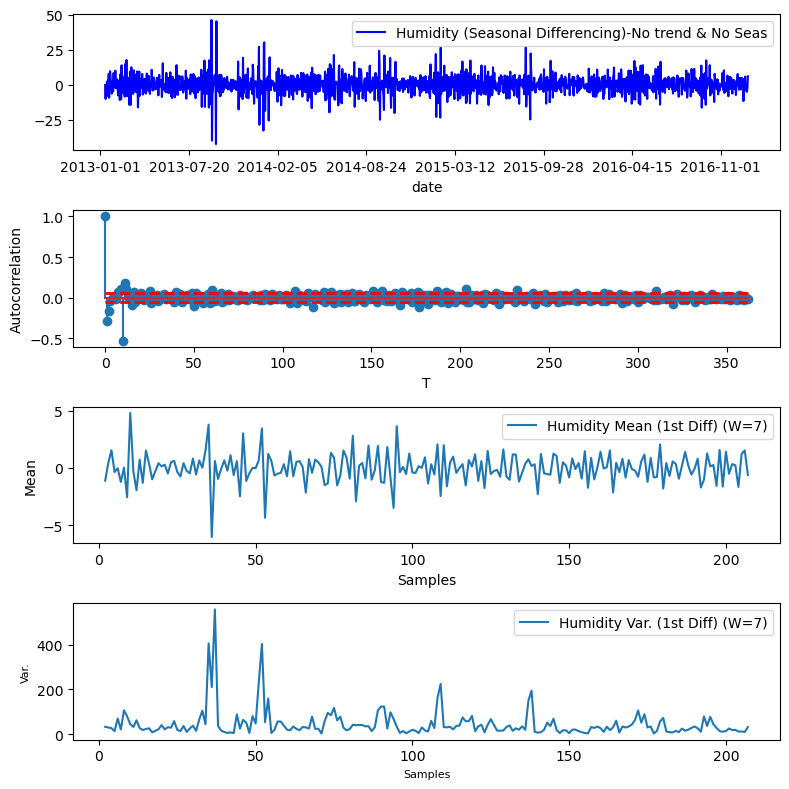

In [83]:
def meanvarWtime(timeseries,W):
    Nwin=int(np.floor(timeseries.size/W))
    vals=timeseries.to_numpy()
    vals=vals[0:int(Nwin*W)]
    mvals=vals.reshape((Nwin,W))
    return {'mu':np.mean(mvals,axis=1),'var':np.var(mvals,axis=1)}


#Raw
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

WTS.plot(ax=axs[0],legend=True,color='r')
plt.ylabel('Wind',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=WTS.size
corrl=correlogram(WTS,maxT=int(N/4))
corrl.name='Wind ACS (Raw)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


Win=7 #Compute mean 
meanpsTSSeries=meanvarWtime(WTS,W=Win)['mu']
meanTS=pd.Series(data=meanpsTSSeries,index=np.array(range(meanpsTSSeries.size)),name="Wind Mean (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

varpsTSSeries=meanvarWtime(WTS,W=Win)['var']
varTS=pd.Series(data=varpsTSSeries,index=np.array(range(varpsTSSeries.size)),name="Wind Var. (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#No trend-1st order diff
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=ts_wind.diff()
d1psTS.name="Wind (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[0],legend=True,color='k')
plt.ylabel('Wind Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Wind ACS (No trend)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Wind Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Wind Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#No trend-1st order diff and no seasonality (seas. diff)
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=d1psTS.diff(10)
d1psTS.name="Wind (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[0],legend=True,color='b')
plt.ylabel('Wind Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Wind ACS (No trend & No Seas.)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Wind Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Wind Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

##### Month

<Axes: xlabel='Samples', ylabel='Var.'>

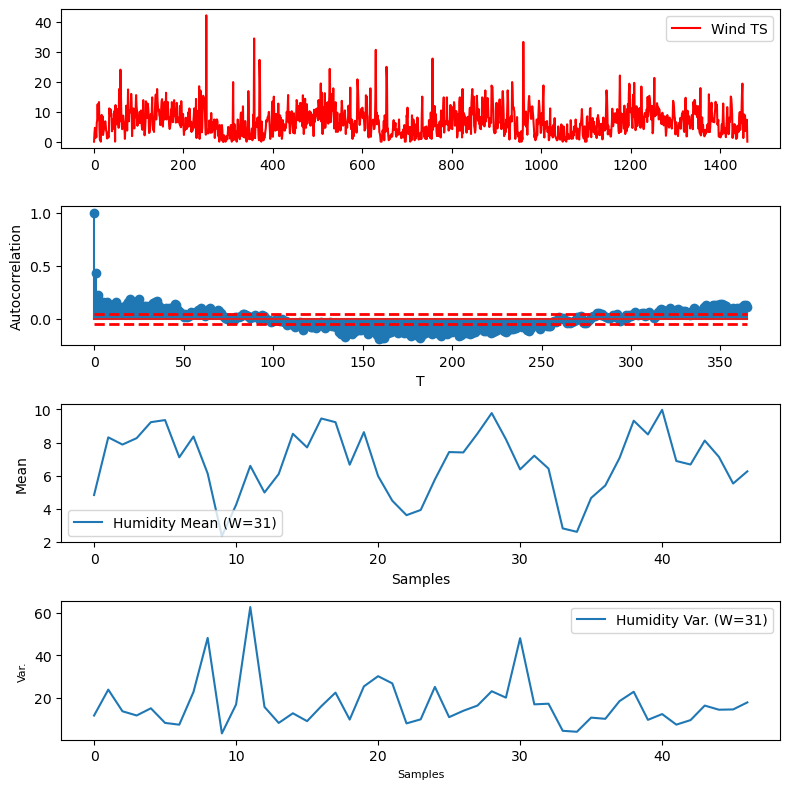

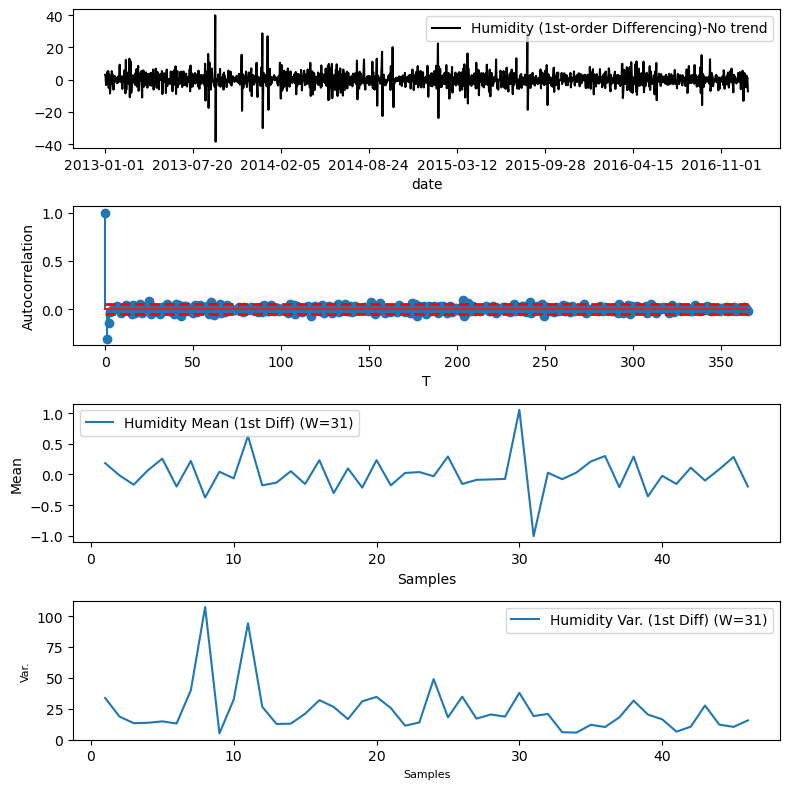

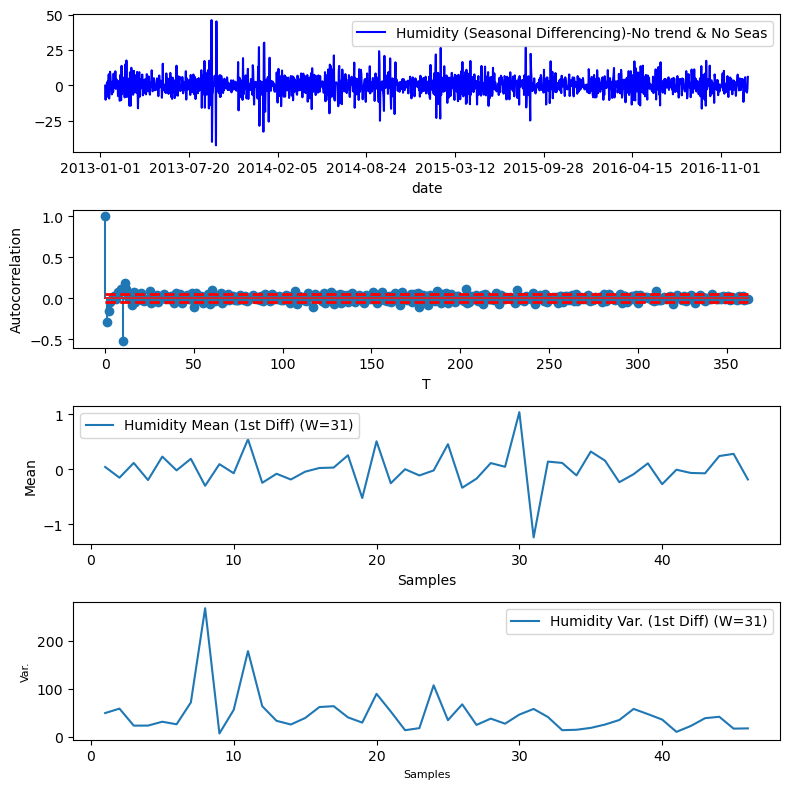

In [85]:
def meanvarWtime(timeseries,W):
    Nwin=int(np.floor(timeseries.size/W))
    vals=timeseries.to_numpy()
    vals=vals[0:int(Nwin*W)]
    mvals=vals.reshape((Nwin,W))
    return {'mu':np.mean(mvals,axis=1),'var':np.var(mvals,axis=1)}


#Raw
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

WTS.plot(ax=axs[0],legend=True,color='r')
plt.ylabel('Wind',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=WTS.size
corrl=correlogram(WTS,maxT=int(N/4))
corrl.name='Wind ACS (Raw)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


Win=31 #Compute mean 
meanpsTSSeries=meanvarWtime(WTS,W=Win)['mu']
meanTS=pd.Series(data=meanpsTSSeries,index=np.array(range(meanpsTSSeries.size)),name="Wind Mean (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

varpsTSSeries=meanvarWtime(WTS,W=Win)['var']
varTS=pd.Series(data=varpsTSSeries,index=np.array(range(varpsTSSeries.size)),name="Wind Var. (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)






#No trend-1st order diff
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=ts_wind.diff()
d1psTS.name="Wind (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[0],legend=True,color='k')
plt.ylabel('Wind Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Wind ACS (No trend)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Wind Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Wind Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#No trend-1st order diff and no seasonality (seas. diff)
fig, axs=plt.subplots(4,tight_layout=True,figsize=(8,8))

d1psTS=d1psTS.diff(10)
d1psTS.name="Wind (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[0],legend=True,color='b')
plt.ylabel('Wind Change',fontdict={'fontsize':8})
plt.xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})

N=d1psTS.dropna().size

corrl=correlogram(d1psTS.dropna(),maxT=int(N/4))
corrl.name='Wind ACS (No trend & No Seas.)'
axs[1].stem(corrl.index,corrl['ACS'])
axs[1].plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2)
axs[1].plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
axs[1].set_xlabel("T")
axs[1].set_ylabel("Autocorrelation")


#Win=24 #Compute mean 
meand1psTSSeries=meanvarWtime(d1psTS,W=Win)['mu']
meanTS=pd.Series(data=meand1psTSSeries,index=np.array(range(meand1psTSSeries.size)),name="Wind Mean (1st Diff) (W="+str(Win)+")")
meanTS.plot(ax=axs[2],xlabel="Samples",ylabel="Mean",legend=True)
#axs[2].set_ylim(-1,1)

vard1psTSSeries=meanvarWtime(d1psTS,W=Win)['var']
varTS=pd.Series(data=vard1psTSSeries,index=np.array(range(vard1psTSSeries.size)),name="Wind Var. (1st Diff) (W="+str(Win)+")")
varTS.plot(ax=axs[3],xlabel="Samples",ylabel="Var.",legend=True)

#### Statistical approach - The unit root test

In [86]:
print("===============Temperature data (RAW)============")
#Raw
result=st.adfuller(WTS)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
#No trend-1st order diff
print("===============Temperature  data (1st differencing)============")

d1psTS=ts_wind.diff()

result=st.adfuller(d1psTS.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



#No trend-1st order diff and no seasonality (seas. diff)
print("===============Temperature  data (1st Differencing+Seasonal Differencing)============")

d1psTS=d1psTS.diff(10)

result=st.adfuller(d1psTS.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


===============Temperature data (RAW)============
ADF Statistic: -3.838097
p-value: 0.002541
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
===============Temperature  data (1st differencing)============
ADF Statistic: -12.837720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
===============Temperature  data (1st Differencing+Seasonal Differencing)============
ADF Statistic: -15.106218
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


### Pressure

In [30]:
ts_meanpressure= df_train[['date', 'meanpressure']]
ts_meanpressure = ts_meanpressure.set_index('date')
ts_pressure = ts_meanpressure.squeeze()
print(type(ts_pressure))
ts_pressure

<class 'pandas.core.series.Series'>


date
2013-01-01    1015.666667
2013-01-02    1017.800000
2013-01-03    1018.666667
2013-01-04    1017.166667
2013-01-05    1016.500000
                 ...     
2016-12-28    1015.565217
2016-12-29    1016.904762
2016-12-30    1017.904762
2016-12-31    1016.100000
2017-01-01    1016.000000
Name: meanpressure, Length: 1462, dtype: float64

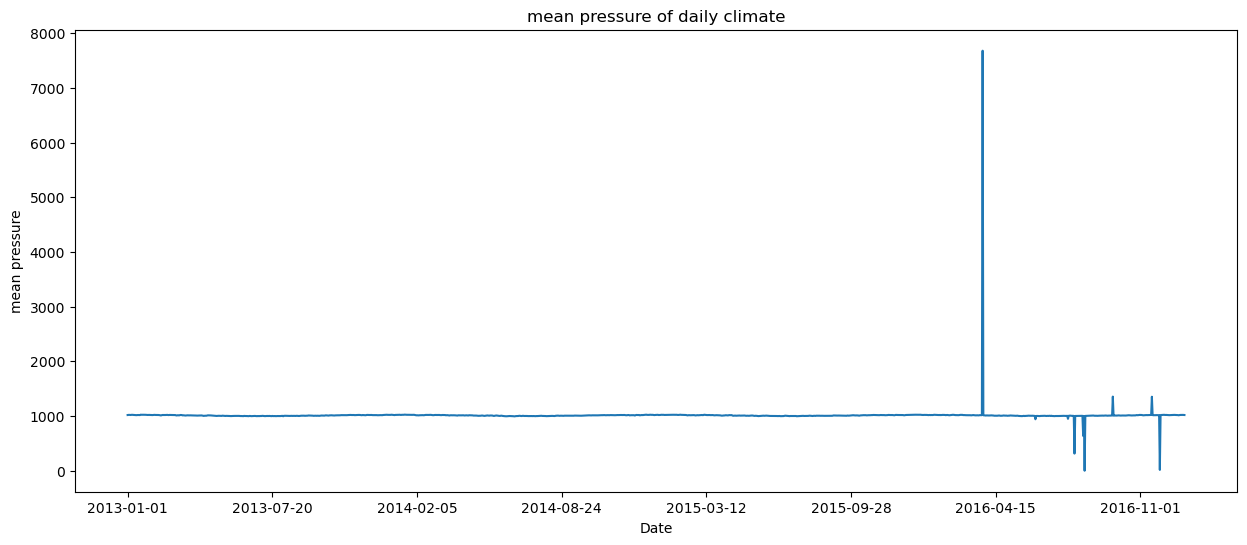

In [31]:
fig, ax = plt.subplots(figsize=(15,6))
ts_pressure.plot(xlabel="Date", ylabel="mean pressure", title="mean pressure of daily climate", ax=ax);